In [1]:
# Install XGBoost
!pip install xgboost

In [2]:
# coding: utf-8
from pathlib import Path

import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb

In [3]:
print('Data Gaia yang Berisi 626 Ribu Bintang (Data Release 3) V2')
# load or create your dataset
data = pd.read_csv('C:\\Users\\ACER\\OneDrive\\Documents\\Gaia626kStarsDR3V2\\dataGaia2.csv')
df = pd.DataFrame(data)
df

Data Gaia yang Berisi 626 Ribu Bintang (Data Release 3) V2


,Unnamed: 0,RA_ICRS,DE_ICRS,Source,e_RA_ICRS,e_DE_ICRS,Plx,e_Plx,PM,pmRA,...,Lum-Flame,Mass-Flame,Age-Flame,z-Flame,Evol,SpType-ELS,Flags-HS,EWHa,e_EWHa,f_EWHa
0,0,44.589012,2.195298,1306361548360576,0.0655,0.0612,0.2384,0.0769,2.901,2.088,...,298.485140,NaN,NaN,1.507248,NaN,O,92,0.02128,0.19309,0
1,1,35.358035,8.988813,23700286669971584,0.0658,0.0717,0.1666,0.0785,4.402,-0.242,...,292.672100,NaN,NaN,1.332909,NaN,O,92,0.02144,0.17600,0
2,2,44.450767,10.079118,27109837867995776,0.0627,0.0517,0.3544,0.0727,3.154,2.722,...,506.732800,NaN,NaN,1.582338,NaN,O,92,0.13726,0.13364,0
3,3,48.404909,15.105912,31009771252186752,0.0500,0.0421,0.5962,0.0557,2.745,2.460,...,9.055018,NaN,NaN,1.561845,NaN,O,93,0.09470,0.10548,0
4,4,57.092838,11.550927,36876009385300352,0.0521,0.0335,0.4507,0.0575,4.918,-2.851,...,311.502840,NaN,NaN,1.521734,NaN,O,92,0.08682,0.07831,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626011,99995,265.014378,-32.394151,4054211323680176128,0.1134,0.0849,0.6165,0.1288,7.970,-4.134,...,13.813293,1.386,3.640,0.206649,746.0,M,94,-0.06731,0.18151,1
626012,99996,264.799179,-32.493502,4054211946505530368,0.0796,0.0672,0.1297,0.1112,3.923,-2.436,...,2276.811500,1.923,1.340,0.003901,1217.0,M,92,-0.41858,0.40188,1
626013,99997,265.136133,-32.316888,4054218573592475392,0.0688,0.0632,0.4473,0.0806,7.339,-2.913,...,286.015800,3.465,0.239,0.599263,292.0,M,93,0.03248,0.12931,0
626014,99998,265.003326,-32.277560,4054221257994693376,0.0507,0.0387,0.3639,0.0568,3.100,1.800,...,542.240050,1.950,1.292,0.007884,1288.0,M,92,0.12118,0.05450,1


In [4]:
df.info() # Tampilkan info data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626016 entries, 0 to 626015
Data columns (total 50 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  626016 non-null  int64  
 1   RA_ICRS     626016 non-null  float64
 2   DE_ICRS     626016 non-null  float64
 3   Source      626016 non-null  int64  
 4   e_RA_ICRS   626016 non-null  float64
 5   e_DE_ICRS   626016 non-null  float64
 6   Plx         626016 non-null  float64
 7   e_Plx       626016 non-null  float64
 8   PM          626016 non-null  float64
 9   pmRA        626016 non-null  float64
 10  e_pmRA      626016 non-null  float64
 11  pmDE        626016 non-null  float64
 12  e_pmDE      626016 non-null  float64
 13  RUWE        626016 non-null  float64
 14  Gmag        626015 non-null  float64
 15  e_Gmag      626015 non-null  float64
 16  BPmag       626015 non-null  float64
 17  e_BPmag     626015 non-null  float64
 18  RPmag       626016 non-null  float64
 19  e_

In [5]:
logg = data['logg'].to_list()
Fe_H = data['[Fe/H]'].to_list()

PQSO = data['PQSO'].to_list()
PGal = data['PGal'].to_list()
Pstar = data['Pstar'].to_list()
PWD = data['PWD'].to_list()
Pbin = data['Pbin'].to_list()

Teff = data['Teff'].to_list()
Evol = data['Evol'].to_list()

Rad = data['Rad-Flame'].to_list()
Lum = data['Lum-Flame'].to_list()
Mass = data['Mass-Flame'].to_list()
Age = data['Age-Flame'].to_list()
Spectral_Type = data['SpType-ELS'].to_list()

In [6]:
data_new = {'logg':logg,'Metallicity':Fe_H,'Teff':Teff,'Rad':Rad,'Lum':Lum,'Mass':Mass,'Age':Age,'SpectralType':Spectral_Type,
            'Evol':Evol,'PQSO':PQSO,'PGal':PGal,'Pstar':Pstar,'PWD':PWD,'Pbin':Pbin}
df_new = pd.DataFrame(data_new)
df_new

,logg,Metallicity,Teff,Rad,Lum,Mass,Age,SpectralType,Evol,PQSO,PGal,Pstar,PWD,Pbin
0,4.5728,-0.9759,18148.6110,1.7096,298.485140,NaN,NaN,O,NaN,0.0,1.160000e-06,0.000050,0.999948,5.000000e-07
1,4.4948,-1.1661,17500.2360,1.8249,292.672100,NaN,NaN,O,NaN,0.0,1.530000e-06,0.000050,0.999948,5.000000e-07
2,4.5526,-0.9919,19761.3630,1.9063,506.732800,NaN,NaN,O,NaN,0.0,1.000000e-08,0.000050,0.999950,5.000000e-07
3,4.5211,-0.9392,19486.8000,0.2579,9.055018,NaN,NaN,O,NaN,0.0,0.000000e+00,0.999998,0.000002,0.000000e+00
4,4.5807,-0.9965,18453.3460,1.7220,311.502840,NaN,NaN,O,NaN,0.0,1.000000e-08,0.000050,0.999950,5.000000e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626011,3.4916,0.1914,4795.5200,5.3586,13.813293,1.386,3.640,M,746.0,0.0,0.000000e+00,0.999999,0.000000,7.300000e-07
626012,0.1911,-0.8501,3693.1008,118.3552,2276.811500,1.923,1.340,M,1217.0,0.0,0.000000e+00,1.000000,0.000000,0.000000e+00
626013,4.0372,0.7552,10367.2170,5.2304,286.015800,3.465,0.239,M,292.0,0.0,0.000000e+00,1.000000,0.000000,1.800000e-07
626014,0.6830,-0.2191,3586.8994,58.7696,542.240050,1.950,1.292,M,1288.0,0.0,0.000000e+00,1.000000,0.000000,0.000000e+00


In [7]:
# Cek apakah terdapat angka infinit atau tidak.
print()
print("Checking for NaN values")

# Tampilkan kalimat "printing the count of infinity values".
print()
print("Printing the count of NaN values")

# Hitung ada berapa angka yang memiliki nilai kosong pada baris logg.
check_logg_nan = np.isnan(df_new['logg']).values.sum()
print("logg contains " + str(check_logg_nan) + " NaN values.")

# Hitung ada berapa angka yang memiliki nilai kosong pada baris [Fe/H].
check_feh_nan = np.isnan(df_new['Metallicity']).values.sum()
print("[Fe/H] contains " + str(check_feh_nan) + " NaN values.")

# Hitung ada berapa angka yang memiliki nilai kosong pada baris Teff.
check_teff_nan = np.isnan(df_new['Teff']).values.sum()
print("Teff contains " + str(check_teff_nan) + " NaN values.")

# Hitung ada berapa angka yang memiliki nilai kosong pada baris Rad.
check_rad_nan = np.isnan(df_new['Rad']).values.sum()
print("Rad contains " + str(check_rad_nan) + " NaN values.")

# Hitung ada berapa angka yang memiliki nilai kosong pada baris Lum.
check_lum_nan = np.isnan(df_new['Lum']).values.sum()
print("Lum contains " + str(check_lum_nan) + " NaN values.")

# Hitung ada berapa angka yang memiliki nilai kosong pada baris Mass.
check_mass_nan = np.isnan(df_new['Mass']).values.sum()
print("Mass contains " + str(check_mass_nan) + " NaN values.")

# Hitung ada berapa angka yang memiliki nilai kosong pada baris Age.
check_age_nan = np.isnan(df_new['Age']).values.sum()
print("Age contains " + str(check_age_nan) + " NaN values.")

# Hitung ada berapa angka yang memiliki nilai kosong pada baris Evol.
check_Evol_nan = np.isnan(df_new['Evol']).values.sum()
print("Evol contains " + str(check_Evol_nan) + " NaN values.")


Checking for NaN values

Printing the count of NaN values
logg contains 0 NaN values.
[Fe/H] contains 0 NaN values.
Teff contains 0 NaN values.
Rad contains 14723 NaN values.
Lum contains 14723 NaN values.
Mass contains 35220 NaN values.
Age contains 81335 NaN values.
Evol contains 35219 NaN values.


In [8]:
# Cek apakah terdapat angka infinit atau tidak.
print()
print("Checking for infinite values")

# Tampilkan kalimat "printing the count of infinity values".
print()
print("Printing the count of infinite values")

# Hitung ada berapa angka yang memiliki nilai infinit pada baris logg.
check_logg_inf = np.isinf(df_new['logg']).values.sum()
print("logg contains " + str(check_logg_inf) + " infinite values.")

# Hitung ada berapa angka yang memiliki nilai infinit pada baris [Fe/H].
check_feh_inf = np.isinf(df_new['Metallicity']).values.sum()
print("[Fe/H] contains " + str(check_feh_inf) + " infinite values.")

# Hitung ada berapa angka yang memiliki nilai infinit pada baris Teff.
check_teff_inf = np.isinf(df_new['Teff']).values.sum()
print("Teff contains " + str(check_teff_inf) + " infinite values.")

# Hitung ada berapa angka yang memiliki nilai infinit pada baris Rad.
check_rad_inf = np.isinf(df_new['Rad']).values.sum()
print("Rad contains " + str(check_rad_inf) + " infinite values.")

# Hitung ada berapa angka yang memiliki nilai infinit pada baris Lum.
check_lum_inf = np.isinf(df_new['Lum']).values.sum()
print("Lum contains " + str(check_lum_inf) + " infinite values.")

# Hitung ada berapa angka yang memiliki nilai infinit pada baris Mass.
check_mass_inf = np.isinf(df_new['Mass']).values.sum()
print("Mass contains " + str(check_mass_inf) + " infinite values.")

# Hitung ada berapa angka yang memiliki nilai infinit pada baris Age.
check_age_inf = np.isinf(df_new['Age']).values.sum()
print("Age contains " + str(check_age_inf) + " infinite values.")

# Hitung ada berapa angka yang memiliki nilai infinit pada baris Evol.
check_Evol_inf = np.isinf(df_new['Evol']).values.sum()
print("Evol contains " + str(check_Evol_inf) + " infinite values.")


Checking for infinite values

Printing the count of infinite values
logg contains 0 infinite values.
[Fe/H] contains 0 infinite values.
Teff contains 0 infinite values.
Rad contains 0 infinite values.
Lum contains 0 infinite values.
Mass contains 0 infinite values.
Age contains 0 infinite values.
Evol contains 0 infinite values.


In [9]:
data_fix = {'logg':logg,'Metallicity':Fe_H,'Teff':Teff,'Rad':Rad,'Lum':Lum,'Mass':Mass,'Age':Age,'SpectralType':Spectral_Type,
            'Evol':Evol,'PQSO':PQSO,'PGal':PGal,'Pstar':Pstar,'PWD':PWD,'Pbin':Pbin}
df_fix = pd.DataFrame(data_fix)

# Drop baris yang memiliki nilai 'NaN'.
df_fix.dropna(inplace=True)

df_fix = df_fix.reset_index(drop=True)

# Tampilkan data.
df_fix

,logg,Metallicity,Teff,Rad,Lum,Mass,Age,SpectralType,Evol,PQSO,PGal,Pstar,PWD,Pbin
0,3.7523,-0.7218,10206.0730,3.4369,115.662890,2.935,0.315,B,261.0,0.0,0.0,0.996523,1.000000e-08,3.477410e-03
1,3.6170,-1.0002,10268.3090,3.1815,102.392800,2.870,0.315,B,251.0,0.0,0.0,0.999585,4.000000e-08,4.152500e-04
2,4.1773,0.7895,10686.8590,2.2654,60.402218,2.647,0.225,B,185.0,0.0,0.0,0.998489,7.000000e-08,1.511040e-03
3,3.8030,-0.9179,10518.3210,3.2403,116.270890,2.962,0.291,B,251.0,0.0,0.0,0.999723,3.000000e-08,2.768700e-04
4,3.8985,-0.9965,10444.9670,2.7844,83.295970,2.774,0.300,B,230.0,0.0,0.0,0.999858,2.000000e-08,1.424100e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544676,3.4916,0.1914,4795.5200,5.3586,13.813293,1.386,3.640,M,746.0,0.0,0.0,0.999999,0.000000e+00,7.300000e-07
544677,0.1911,-0.8501,3693.1008,118.3552,2276.811500,1.923,1.340,M,1217.0,0.0,0.0,1.000000,0.000000e+00,0.000000e+00
544678,4.0372,0.7552,10367.2170,5.2304,286.015800,3.465,0.239,M,292.0,0.0,0.0,1.000000,0.000000e+00,1.800000e-07
544679,0.6830,-0.2191,3586.8994,58.7696,542.240050,1.950,1.292,M,1288.0,0.0,0.0,1.000000,0.000000e+00,0.000000e+00


[]

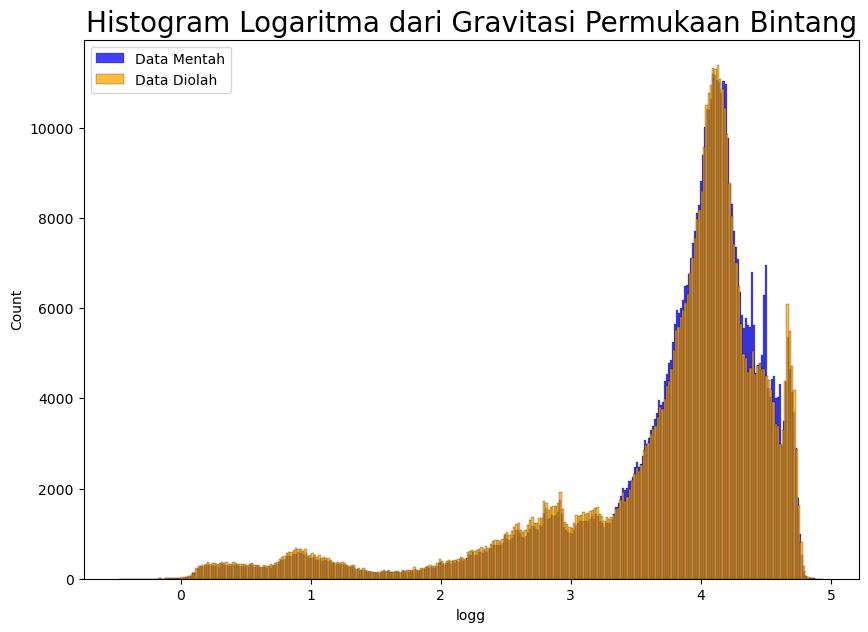

In [10]:
# Buat histogram logaritma dari gravitasi permukaan bintang.
fig, ax = plt.subplots(figsize = (10,7))
plt.title('Histogram Logaritma dari Gravitasi Permukaan Bintang', fontsize=20)
sns.histplot(data=df_new, x="logg",label='Data Mentah',color='blue')
sns.histplot(data=df_fix, x="logg",label='Data Diolah',color='orange')
plt.legend()
plt.plot()

[]

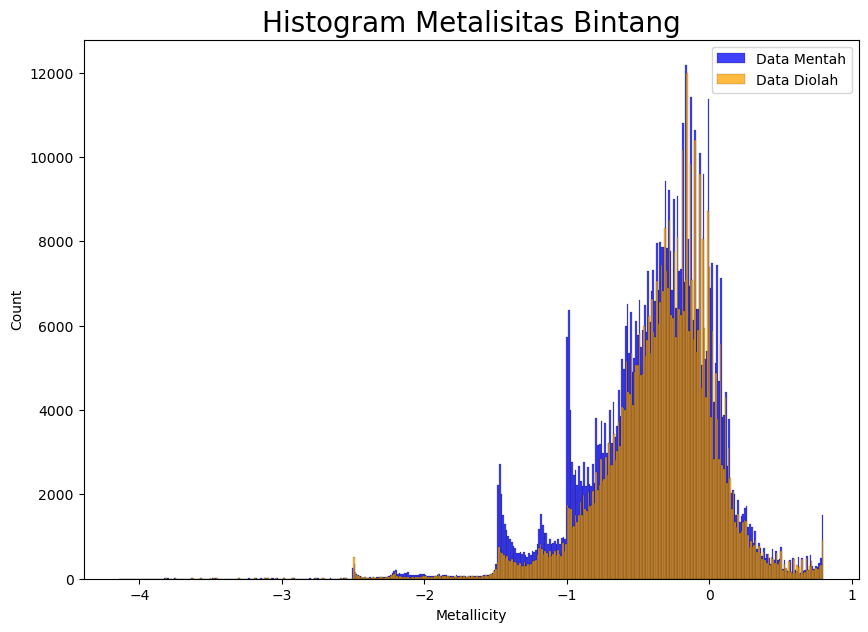

In [11]:
# Buat histogram metalisitas bintang.
fig, ax = plt.subplots(figsize = (10,7))
plt.title('Histogram Metalisitas Bintang', fontsize=20)
sns.histplot(data=df_new, x="Metallicity",label='Data Mentah',color='blue')
sns.histplot(data=df_fix, x="Metallicity",label='Data Diolah',color='orange')
plt.legend()
plt.plot()

[]

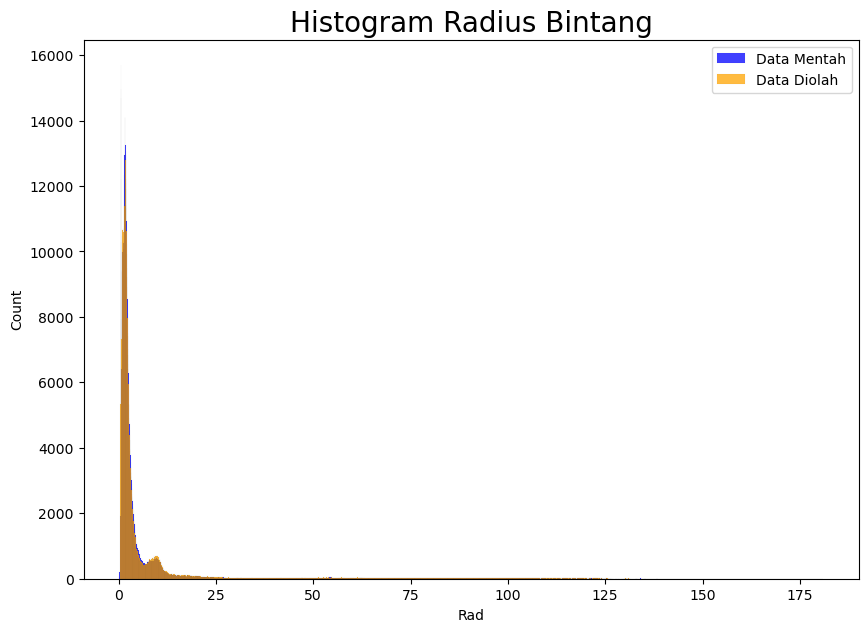

In [12]:
# Buat histogram radius bintang.
fig, ax = plt.subplots(figsize = (10,7))
plt.title('Histogram Radius Bintang', fontsize=20)
sns.histplot(data=df_new, x="Rad",label='Data Mentah',color='blue')
sns.histplot(data=df_fix, x="Rad",label='Data Diolah',color='orange')
plt.legend()
plt.plot()

[]

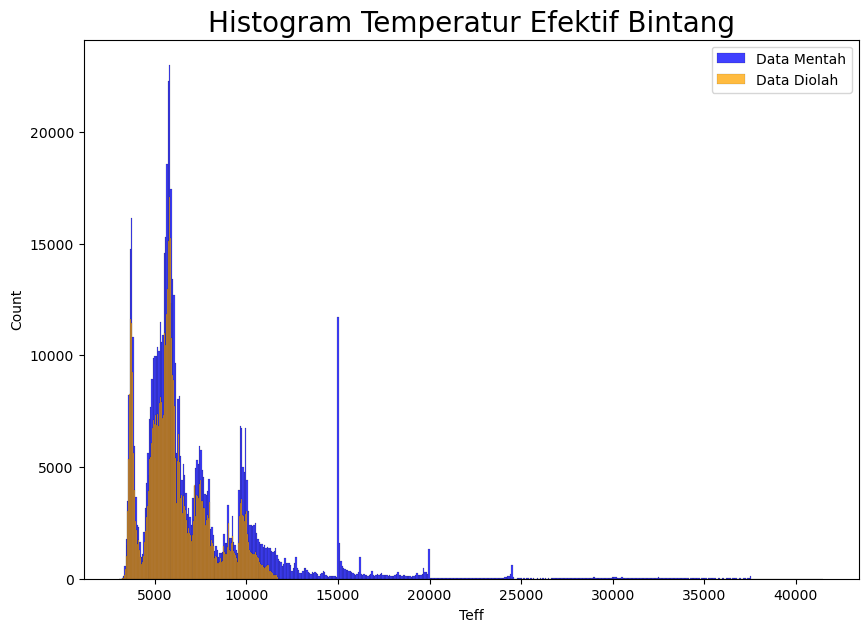

In [13]:
# Buat histogram temperatur efektif bintang.
fig, ax = plt.subplots(figsize = (10,7))
plt.title('Histogram Temperatur Efektif Bintang', fontsize=20)
sns.histplot(data=df_new, x="Teff",label='Data Mentah',color='blue')
sns.histplot(data=df_fix, x="Teff",label='Data Diolah',color='orange')
plt.legend()
plt.plot()

[]

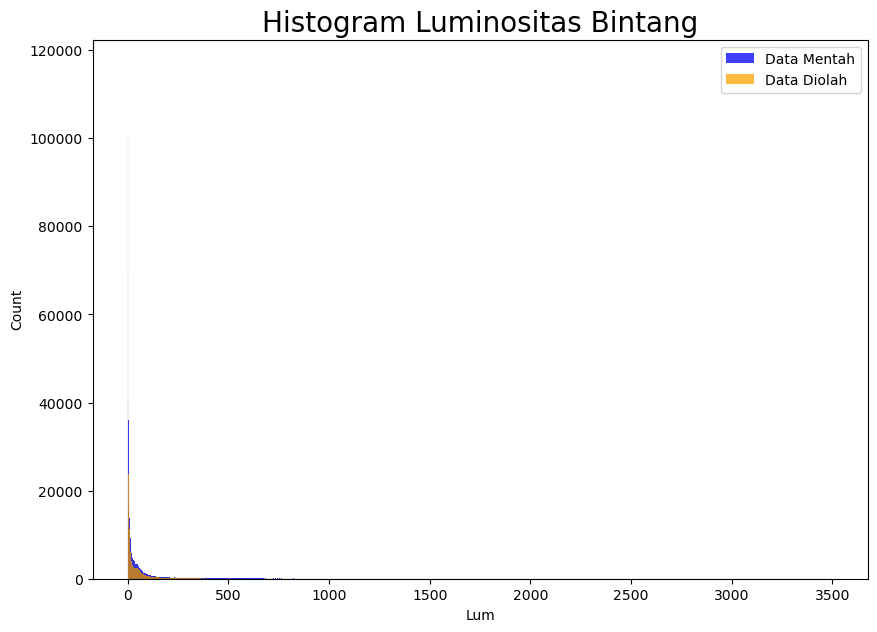

In [14]:
# Buat histogram luminositas bintang.
fig, ax = plt.subplots(figsize = (10,7))
plt.title('Histogram Luminositas Bintang', fontsize=20)
sns.histplot(data=df_new, x="Lum",label='Data Mentah',color='blue')
sns.histplot(data=df_fix, x="Lum",label='Data Diolah',color='orange')
plt.legend()
plt.plot()

[]

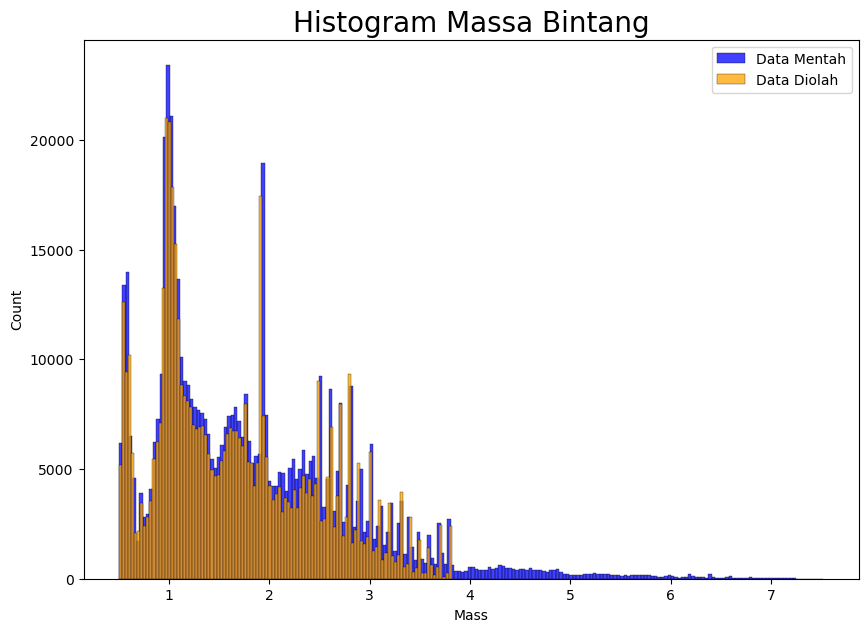

In [15]:
# Buat histogram massa bintang.
fig, ax = plt.subplots(figsize = (10,7))
plt.title('Histogram Massa Bintang', fontsize=20)
sns.histplot(data=df_new, x="Mass",label='Data Mentah',color='blue')
sns.histplot(data=df_fix, x="Mass",label='Data Diolah',color='orange')
plt.legend()
plt.plot()

In [16]:
df_fix_B = df_fix[(df_fix['SpectralType'] == 'B      ')]
df_fix_B = df_fix_B.reset_index(drop=True)
df_fix_B

,logg,Metallicity,Teff,Rad,Lum,Mass,Age,SpectralType,Evol,PQSO,PGal,Pstar,PWD,Pbin
0,3.7523,-0.7218,10206.0730,3.4369,115.662890,2.935,0.315,B,261.0,0.0,0.0,0.996523,1.000000e-08,0.003477
1,3.6170,-1.0002,10268.3090,3.1815,102.392800,2.870,0.315,B,251.0,0.0,0.0,0.999585,4.000000e-08,0.000415
2,4.1773,0.7895,10686.8590,2.2654,60.402218,2.647,0.225,B,185.0,0.0,0.0,0.998489,7.000000e-08,0.001511
3,3.8030,-0.9179,10518.3210,3.2403,116.270890,2.962,0.291,B,251.0,0.0,0.0,0.999723,3.000000e-08,0.000277
4,3.8985,-0.9965,10444.9670,2.7844,83.295970,2.774,0.300,B,230.0,0.0,0.0,0.999858,2.000000e-08,0.000142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44676,3.7012,-0.5164,10647.6580,3.8647,172.919250,3.220,0.261,B,270.0,0.0,0.0,0.999989,0.000000e+00,0.000011
44677,3.7327,-0.6030,9767.9260,2.2388,41.441050,2.384,0.345,B,198.0,0.0,0.0,0.999987,0.000000e+00,0.000013
44678,3.7275,-0.7558,9977.4130,3.5301,111.363660,2.896,0.335,B,265.0,0.0,0.0,0.999992,0.000000e+00,0.000008
44679,3.9072,-1.1540,11672.9375,3.3196,184.206820,3.343,0.202,B,245.0,0.0,0.0,0.999985,1.000000e-08,0.000015


In [17]:
df_new_B = df_new[(df_new['SpectralType'] == 'B      ')]
df_new_B = df_new_B.reset_index(drop=True)
df_new_B

,logg,Metallicity,Teff,Rad,Lum,Mass,Age,SpectralType,Evol,PQSO,PGal,Pstar,PWD,Pbin
0,4.0962,0.6396,12291.8370,2.7324,154.090320,3.317,NaN,B,204.0,0.0,0.0,0.999963,7.000000e-08,0.000037
1,3.7523,-0.7218,10206.0730,3.4369,115.662890,2.935,0.315,B,261.0,0.0,0.0,0.996523,1.000000e-08,0.003477
2,3.6170,-1.0002,10268.3090,3.1815,102.392800,2.870,0.315,B,251.0,0.0,0.0,0.999585,4.000000e-08,0.000415
3,4.1773,0.7895,10686.8590,2.2654,60.402218,2.647,0.225,B,185.0,0.0,0.0,0.998489,7.000000e-08,0.001511
4,3.8030,-0.9179,10518.3210,3.2403,116.270890,2.962,0.291,B,251.0,0.0,0.0,0.999723,3.000000e-08,0.000277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3.8653,-1.0590,12048.2520,3.0251,173.725770,3.352,NaN,B,227.0,0.0,0.0,0.999878,3.000000e-08,0.000122
99996,3.7526,-0.8780,11702.2080,2.7357,124.722336,3.118,NaN,B,212.0,0.0,0.0,0.999987,1.000000e-08,0.000013
99997,3.9072,-1.1540,11672.9375,3.3196,184.206820,3.343,0.202,B,245.0,0.0,0.0,0.999985,1.000000e-08,0.000015
99998,3.7215,-0.6448,10334.6680,2.3251,56.700264,2.583,0.274,B,196.0,0.0,0.0,0.999983,0.000000e+00,0.000017


In [18]:
df_fix_B_QSO = df_fix_B[(df_fix_B['PQSO'] > 0.5)]
df_fix_B_QSO = df_fix_B_QSO.reset_index(drop=True)
df_fix_B_QSO

,logg,Metallicity,Teff,Rad,Lum,Mass,Age,SpectralType,Evol,PQSO,PGal,Pstar,PWD,Pbin


In [19]:
df_fix_B_Gal = df_fix_B[(df_fix_B['PGal'] > 0.5)]
df_fix_B_Gal = df_fix_B_Gal.reset_index(drop=True)
df_fix_B_Gal

,logg,Metallicity,Teff,Rad,Lum,Mass,Age,SpectralType,Evol,PQSO,PGal,Pstar,PWD,Pbin


In [20]:
df_fix_B_Star = df_fix_B[(df_fix_B['Pstar'] > 0.5)]
df_fix_B_Star = df_fix_B_Star.reset_index(drop=True)
df_fix_B_Star

,logg,Metallicity,Teff,Rad,Lum,Mass,Age,SpectralType,Evol,PQSO,PGal,Pstar,PWD,Pbin
0,3.7523,-0.7218,10206.0730,3.4369,115.662890,2.935,0.315,B,261.0,0.0,0.0,0.996523,1.000000e-08,0.003477
1,3.6170,-1.0002,10268.3090,3.1815,102.392800,2.870,0.315,B,251.0,0.0,0.0,0.999585,4.000000e-08,0.000415
2,4.1773,0.7895,10686.8590,2.2654,60.402218,2.647,0.225,B,185.0,0.0,0.0,0.998489,7.000000e-08,0.001511
3,3.8030,-0.9179,10518.3210,3.2403,116.270890,2.962,0.291,B,251.0,0.0,0.0,0.999723,3.000000e-08,0.000277
4,3.8985,-0.9965,10444.9670,2.7844,83.295970,2.774,0.300,B,230.0,0.0,0.0,0.999858,2.000000e-08,0.000142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44655,3.7012,-0.5164,10647.6580,3.8647,172.919250,3.220,0.261,B,270.0,0.0,0.0,0.999989,0.000000e+00,0.000011
44656,3.7327,-0.6030,9767.9260,2.2388,41.441050,2.384,0.345,B,198.0,0.0,0.0,0.999987,0.000000e+00,0.000013
44657,3.7275,-0.7558,9977.4130,3.5301,111.363660,2.896,0.335,B,265.0,0.0,0.0,0.999992,0.000000e+00,0.000008
44658,3.9072,-1.1540,11672.9375,3.3196,184.206820,3.343,0.202,B,245.0,0.0,0.0,0.999985,1.000000e-08,0.000015


In [21]:
df_fix_B_WD = df_fix_B[(df_fix_B['PWD'] > 0.5)]
df_fix_B_WD = df_fix_B_WD.reset_index(drop=True)
df_fix_B_WD

,logg,Metallicity,Teff,Rad,Lum,Mass,Age,SpectralType,Evol,PQSO,PGal,Pstar,PWD,Pbin
0,4.2245,0.0370,10882.887,2.4328,75.18504,2.769,0.229,B,198.0,0.365345,2.000000e-08,0.00039,0.634261,3.900000e-06
1,3.8092,-0.8445,11680.873,3.3332,186.44177,3.354,0.201,B,246.0,0.000000,0.000000e+00,0.00005,0.999950,5.000000e-07


In [22]:
df_fix_B_Bin = df_fix_B[(df_fix_B['Pbin'] > 0.5)]
df_fix_B_Bin = df_fix_B_Bin.reset_index(drop=True)
df_fix_B_Bin

,logg,Metallicity,Teff,Rad,Lum,Mass,Age,SpectralType,Evol,PQSO,PGal,Pstar,PWD,Pbin
0,3.8352,-0.3971,10371.6010,3.3948,120.184296,2.969,0.301,B,258.0,0.0,0.0,0.000001,0.000002,0.999997
1,3.6849,-0.6350,10596.6220,3.9495,177.241380,3.232,0.262,B,272.0,0.0,0.0,0.000001,0.000003,0.999996
2,4.0573,0.0504,10027.1455,2.1476,42.030098,2.416,0.288,B,184.0,0.0,0.0,0.000001,0.000003,0.999996
3,3.9528,0.1320,10093.6420,3.0430,86.584240,2.762,0.341,B,247.0,0.0,0.0,0.000001,0.000000,0.999999
4,3.8912,-1.0485,10576.1310,2.7264,83.755005,2.788,0.285,B,225.0,0.0,0.0,0.000001,0.000000,0.999999
5,4.1770,0.1316,10489.2470,2.3031,57.810410,2.603,0.256,B,193.0,0.0,0.0,0.000001,0.000003,0.999996
6,4.0095,0.5867,10599.5550,2.7160,83.905890,2.791,0.281,B,224.0,0.0,0.0,0.000001,0.000002,0.999997
7,3.9686,-0.9869,10385.0350,2.5205,66.553380,2.655,0.295,B,213.0,0.0,0.0,0.000001,0.000003,0.999996
8,4.0330,-1.3763,10583.4830,2.1056,50.017700,2.554,0.200,B,168.0,0.0,0.0,0.000001,0.000002,0.999997
9,4.0688,0.0821,10006.4370,2.5134,56.968613,2.544,0.345,B,218.0,0.0,0.0,0.000001,0.000005,0.999994


In [23]:
df_fix_A = df_fix[(df_fix['SpectralType'] == 'A      ')]
df_fix_A = df_fix_A.reset_index(drop=True)
df_fix_A

,logg,Metallicity,Teff,Rad,Lum,Mass,Age,SpectralType,Evol,PQSO,PGal,Pstar,PWD,Pbin
0,3.9742,-0.5927,9406.7210,2.1681,33.161472,2.255,0.404,A,198.0,0.0,0.0,0.999931,1.000000e-08,0.000069
1,4.0409,0.2723,9348.7420,1.9306,25.817343,2.157,0.336,A,171.0,0.0,0.0,0.999517,2.000000e-08,0.000483
2,4.0498,-0.2544,7520.7060,1.9113,10.527038,1.688,1.033,A,210.0,0.0,0.0,0.999751,0.000000e+00,0.000249
3,3.7225,-0.2723,7052.3300,3.0551,20.801886,1.923,1.124,A,276.0,0.0,0.0,0.999151,0.000000e+00,0.000849
4,3.9814,-1.2165,9982.7990,2.2645,45.868046,2.447,0.320,A,198.0,0.0,0.0,0.999292,1.000000e-08,0.000708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,4.0926,-0.4228,7820.0957,1.6812,9.890652,1.703,0.655,A,170.0,0.0,0.0,0.999994,0.000000e+00,0.000006
99996,4.0443,-0.0939,7325.5870,2.2034,12.624736,1.737,1.188,A,238.0,0.0,0.0,0.999950,0.000000e+00,0.000050
99997,4.2215,-0.2116,8843.7600,1.7442,16.743800,1.955,0.349,A,155.0,0.0,0.0,0.999370,1.000000e-08,0.000630
99998,3.6544,0.1787,9006.4490,3.5740,75.526085,2.620,0.462,A,273.0,0.0,0.0,0.999980,0.000000e+00,0.000020


In [24]:
df_new_A = df_new[(df_new['SpectralType'] == 'A      ')]
df_new_A = df_new_A.reset_index(drop=True)
df_new_A

,logg,Metallicity,Teff,Rad,Lum,Mass,Age,SpectralType,Evol,PQSO,PGal,Pstar,PWD,Pbin
0,3.9742,-0.5927,9406.7210,2.1681,33.161472,2.255,0.404,A,198.0,0.0,0.0,0.999931,1.000000e-08,0.000069
1,4.0409,0.2723,9348.7420,1.9306,25.817343,2.157,0.336,A,171.0,0.0,0.0,0.999517,2.000000e-08,0.000483
2,4.0498,-0.2544,7520.7060,1.9113,10.527038,1.688,1.033,A,210.0,0.0,0.0,0.999751,0.000000e+00,0.000249
3,3.7225,-0.2723,7052.3300,3.0551,20.801886,1.923,1.124,A,276.0,0.0,0.0,0.999151,0.000000e+00,0.000849
4,3.9814,-1.2165,9982.7990,2.2645,45.868046,2.447,0.320,A,198.0,0.0,0.0,0.999292,1.000000e-08,0.000708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,4.0926,-0.4228,7820.0957,1.6812,9.890652,1.703,0.655,A,170.0,0.0,0.0,0.999994,0.000000e+00,0.000006
99996,4.0443,-0.0939,7325.5870,2.2034,12.624736,1.737,1.188,A,238.0,0.0,0.0,0.999950,0.000000e+00,0.000050
99997,4.2215,-0.2116,8843.7600,1.7442,16.743800,1.955,0.349,A,155.0,0.0,0.0,0.999370,1.000000e-08,0.000630
99998,3.6544,0.1787,9006.4490,3.5740,75.526085,2.620,0.462,A,273.0,0.0,0.0,0.999980,0.000000e+00,0.000020


In [25]:
df_fix_A_QSO = df_fix_A[(df_fix_A['PQSO'] > 0.5)]
df_fix_A_QSO = df_fix_A_QSO.reset_index(drop=True)
df_fix_A_QSO

,logg,Metallicity,Teff,Rad,Lum,Mass,Age,SpectralType,Evol,PQSO,PGal,Pstar,PWD,Pbin


In [26]:
df_fix_A_Gal = df_fix_A[(df_fix_A['PGal'] > 0.5)]
df_fix_A_Gal = df_fix_A_Gal.reset_index(drop=True)
df_fix_A_Gal

,logg,Metallicity,Teff,Rad,Lum,Mass,Age,SpectralType,Evol,PQSO,PGal,Pstar,PWD,Pbin


In [27]:
df_fix_A_Star = df_fix_A[(df_fix_A['Pstar'] > 0.5)]
df_fix_A_Star = df_fix_A_Star.reset_index(drop=True)
df_fix_A_Star

,logg,Metallicity,Teff,Rad,Lum,Mass,Age,SpectralType,Evol,PQSO,PGal,Pstar,PWD,Pbin
0,3.9742,-0.5927,9406.7210,2.1681,33.161472,2.255,0.404,A,198.0,0.0,0.0,0.999931,1.000000e-08,0.000069
1,4.0409,0.2723,9348.7420,1.9306,25.817343,2.157,0.336,A,171.0,0.0,0.0,0.999517,2.000000e-08,0.000483
2,4.0498,-0.2544,7520.7060,1.9113,10.527038,1.688,1.033,A,210.0,0.0,0.0,0.999751,0.000000e+00,0.000249
3,3.7225,-0.2723,7052.3300,3.0551,20.801886,1.923,1.124,A,276.0,0.0,0.0,0.999151,0.000000e+00,0.000849
4,3.9814,-1.2165,9982.7990,2.2645,45.868046,2.447,0.320,A,198.0,0.0,0.0,0.999292,1.000000e-08,0.000708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98127,4.0926,-0.4228,7820.0957,1.6812,9.890652,1.703,0.655,A,170.0,0.0,0.0,0.999994,0.000000e+00,0.000006
98128,4.0443,-0.0939,7325.5870,2.2034,12.624736,1.737,1.188,A,238.0,0.0,0.0,0.999950,0.000000e+00,0.000050
98129,4.2215,-0.2116,8843.7600,1.7442,16.743800,1.955,0.349,A,155.0,0.0,0.0,0.999370,1.000000e-08,0.000630
98130,3.6544,0.1787,9006.4490,3.5740,75.526085,2.620,0.462,A,273.0,0.0,0.0,0.999980,0.000000e+00,0.000020


In [28]:
df_fix_A_WD = df_fix_A[(df_fix_A['PWD'] > 0.5)]
df_fix_A_WD = df_fix_A_WD.reset_index(drop=True)
df_fix_A_WD

,logg,Metallicity,Teff,Rad,Lum,Mass,Age,SpectralType,Evol,PQSO,PGal,Pstar,PWD,Pbin


In [29]:
df_fix_A_Bin = df_fix_A[(df_fix_A['Pbin'] > 0.5)]
df_fix_A_Bin = df_fix_A_Bin.reset_index(drop=True)
df_fix_A_Bin

,logg,Metallicity,Teff,Rad,Lum,Mass,Age,SpectralType,Evol,PQSO,PGal,Pstar,PWD,Pbin
0,4.0858,-1.4969,7672.8520,1.5134,7.153093,1.600,0.424,A,138.0,0.0,0.0,0.000001,0.000002,0.999997
1,4.0847,-0.4394,7253.2440,1.7200,7.362528,1.560,1.120,A,199.0,0.0,0.0,0.000001,0.000002,0.999997
2,4.1290,-0.7876,7697.0264,1.6425,8.532672,1.641,0.707,A,170.0,0.0,0.0,0.000001,0.000000,0.999999
3,4.1706,-0.4611,7139.1226,1.5390,5.540674,1.482,0.904,A,170.0,0.0,0.0,0.000001,0.000003,0.999996
4,3.8905,-0.5815,7698.8096,1.7722,9.980534,1.686,0.843,A,189.0,0.0,0.0,0.000001,0.000000,0.999999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1863,4.2136,-0.2083,7446.7305,1.6610,7.671520,1.589,0.895,A,182.0,0.0,0.0,0.000001,0.000000,0.999999
1864,3.9890,-0.5503,7168.8057,1.9468,9.021976,1.615,1.296,A,225.0,0.0,0.0,0.000001,0.000000,0.999999
1865,4.0562,-1.0933,7755.0957,1.7028,9.464375,1.676,0.749,A,178.0,0.0,0.0,0.000001,0.000000,0.999999
1866,3.9775,-1.0952,8003.7870,1.9377,13.863667,1.811,0.779,A,202.0,0.0,0.0,0.000001,0.000006,0.999993


In [30]:
df_fix_F = df_fix[(df_fix['SpectralType'] == 'F      ')]
df_fix_F = df_fix_F.reset_index(drop=True)
df_fix_F

,logg,Metallicity,Teff,Rad,Lum,Mass,Age,SpectralType,Evol,PQSO,PGal,Pstar,PWD,Pbin
0,4.3388,-0.6980,5819.5605,1.1249,1.291883,0.991,7.869,F,337.0,0.0,0.0,0.999890,0.0,0.000110
1,4.0295,-0.1902,5908.6650,1.6305,2.917930,1.114,6.836,F,413.0,0.0,0.0,0.999680,0.0,0.000320
2,4.1196,-0.3517,6623.5117,1.4984,3.895088,1.334,1.931,F,220.0,0.0,0.0,0.999488,0.0,0.000512
3,3.9762,-0.3084,6107.5460,1.8701,4.366676,1.331,3.415,F,326.0,0.0,0.0,0.999911,0.0,0.000089
4,4.3999,-0.5264,5895.3096,0.9515,0.980023,1.066,0.273,F,109.0,0.0,0.0,0.999932,0.0,0.000068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,4.4091,-0.4267,6845.8447,1.3724,3.728510,1.391,0.430,F,127.0,0.0,0.0,0.999988,0.0,0.000011
99996,4.2586,-0.3594,6336.2275,1.2810,2.381413,1.206,2.240,F,214.0,0.0,0.0,0.999527,0.0,0.000473
99997,4.1883,-0.5716,6679.5080,1.4918,3.980069,1.347,1.725,F,210.0,0.0,0.0,0.999987,0.0,0.000013
99998,4.2374,-0.8252,6039.3657,1.6697,3.328048,1.191,4.904,F,360.0,0.0,0.0,0.999944,0.0,0.000056


In [31]:
df_new_F = df_new[(df_new['SpectralType'] == 'F      ')]
df_new_F = df_new_F.reset_index(drop=True)
df_new_F

,logg,Metallicity,Teff,Rad,Lum,Mass,Age,SpectralType,Evol,PQSO,PGal,Pstar,PWD,Pbin
0,4.3388,-0.6980,5819.5605,1.1249,1.291883,0.991,7.869,F,337.0,0.0,0.0,0.999890,0.0,0.000110
1,4.0295,-0.1902,5908.6650,1.6305,2.917930,1.114,6.836,F,413.0,0.0,0.0,0.999680,0.0,0.000320
2,4.1196,-0.3517,6623.5117,1.4984,3.895088,1.334,1.931,F,220.0,0.0,0.0,0.999488,0.0,0.000512
3,3.9762,-0.3084,6107.5460,1.8701,4.366676,1.331,3.415,F,326.0,0.0,0.0,0.999911,0.0,0.000089
4,4.3999,-0.5264,5895.3096,0.9515,0.980023,1.066,0.273,F,109.0,0.0,0.0,0.999932,0.0,0.000068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,4.4091,-0.4267,6845.8447,1.3724,3.728510,1.391,0.430,F,127.0,0.0,0.0,0.999988,0.0,0.000011
99996,4.2586,-0.3594,6336.2275,1.2810,2.381413,1.206,2.240,F,214.0,0.0,0.0,0.999527,0.0,0.000473
99997,4.1883,-0.5716,6679.5080,1.4918,3.980069,1.347,1.725,F,210.0,0.0,0.0,0.999987,0.0,0.000013
99998,4.2374,-0.8252,6039.3657,1.6697,3.328048,1.191,4.904,F,360.0,0.0,0.0,0.999944,0.0,0.000056


In [32]:
df_fix_F_QSO = df_fix_F[(df_fix_F['PQSO'] > 0.5)]
df_fix_F_QSO = df_fix_F_QSO.reset_index(drop=True)
df_fix_F_QSO

,logg,Metallicity,Teff,Rad,Lum,Mass,Age,SpectralType,Evol,PQSO,PGal,Pstar,PWD,Pbin


In [33]:
df_fix_F_Gal = df_fix_F[(df_fix_F['PGal'] > 0.5)]
df_fix_F_Gal = df_fix_F_Gal.reset_index(drop=True)
df_fix_F_Gal

,logg,Metallicity,Teff,Rad,Lum,Mass,Age,SpectralType,Evol,PQSO,PGal,Pstar,PWD,Pbin


In [34]:
df_fix_F_Star = df_fix_F[(df_fix_F['Pstar'] > 0.5)]
df_fix_F_Star = df_fix_F_Star.reset_index(drop=True)
df_fix_F_Star

,logg,Metallicity,Teff,Rad,Lum,Mass,Age,SpectralType,Evol,PQSO,PGal,Pstar,PWD,Pbin
0,4.3388,-0.6980,5819.5605,1.1249,1.291883,0.991,7.869,F,337.0,0.0,0.0,0.999890,0.0,0.000110
1,4.0295,-0.1902,5908.6650,1.6305,2.917930,1.114,6.836,F,413.0,0.0,0.0,0.999680,0.0,0.000320
2,4.1196,-0.3517,6623.5117,1.4984,3.895088,1.334,1.931,F,220.0,0.0,0.0,0.999488,0.0,0.000512
3,3.9762,-0.3084,6107.5460,1.8701,4.366676,1.331,3.415,F,326.0,0.0,0.0,0.999911,0.0,0.000089
4,4.3999,-0.5264,5895.3096,0.9515,0.980023,1.066,0.273,F,109.0,0.0,0.0,0.999932,0.0,0.000068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99764,4.4091,-0.4267,6845.8447,1.3724,3.728510,1.391,0.430,F,127.0,0.0,0.0,0.999988,0.0,0.000011
99765,4.2586,-0.3594,6336.2275,1.2810,2.381413,1.206,2.240,F,214.0,0.0,0.0,0.999527,0.0,0.000473
99766,4.1883,-0.5716,6679.5080,1.4918,3.980069,1.347,1.725,F,210.0,0.0,0.0,0.999987,0.0,0.000013
99767,4.2374,-0.8252,6039.3657,1.6697,3.328048,1.191,4.904,F,360.0,0.0,0.0,0.999944,0.0,0.000056


In [35]:
df_fix_F_WD = df_fix_F[(df_fix_F['PWD'] > 0.5)]
df_fix_F_WD = df_fix_F_WD.reset_index(drop=True)
df_fix_F_WD

,logg,Metallicity,Teff,Rad,Lum,Mass,Age,SpectralType,Evol,PQSO,PGal,Pstar,PWD,Pbin


In [36]:
df_fix_F_Bin = df_fix_F[(df_fix_F['Pbin'] > 0.5)]
df_fix_F_Bin = df_fix_F_Bin.reset_index(drop=True)
df_fix_F_Bin

,logg,Metallicity,Teff,Rad,Lum,Mass,Age,SpectralType,Evol,PQSO,PGal,Pstar,PWD,Pbin
0,3.9762,-0.2896,6667.1730,1.9662,6.891231,1.496,1.920,F,254.0,0.0,0.0,0.000001,0.000000,0.999999
1,4.0567,-0.3858,6198.8100,1.8722,4.663009,1.352,3.119,F,304.0,0.0,0.0,0.000001,0.000000,0.999999
2,3.9778,-0.1859,6246.8965,2.0797,5.936857,1.429,2.699,F,297.0,0.0,0.0,0.000001,0.000000,0.999999
3,3.9140,-1.0763,7062.2793,1.8713,7.876080,1.565,1.387,F,224.0,0.0,0.0,0.000001,0.000016,0.999983
4,4.3037,-0.3090,5986.7900,1.1018,1.405171,1.073,3.639,F,261.0,0.0,0.0,0.000001,0.000000,0.999999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,3.9254,-0.6851,6413.5840,1.8559,5.263856,1.396,2.547,F,276.0,0.0,0.0,0.000001,0.000000,0.999999
227,4.1176,-0.2343,6524.5260,1.7019,4.743441,1.372,2.358,F,257.0,0.0,0.0,0.000001,0.000000,0.999999
228,4.2178,-0.3476,6266.0205,1.3719,2.613904,1.198,3.330,F,268.0,0.0,0.0,0.000001,0.000000,0.999999
229,4.0922,-0.2942,6171.8726,1.5075,2.971588,1.220,3.857,F,303.0,0.0,0.0,0.000001,0.000000,0.999999


In [37]:
df_fix_G = df_fix[(df_fix['SpectralType'] == 'G      ')]
df_fix_G = df_fix_G.reset_index(drop=True)
df_fix_G

,logg,Metallicity,Teff,Rad,Lum,Mass,Age,SpectralType,Evol,PQSO,PGal,Pstar,PWD,Pbin
0,3.8897,-0.5883,5644.3520,1.2794,1.522989,0.949,12.261,G,404.0,0.0,0.0,0.999976,0.0,2.394000e-05
1,4.3989,-0.1923,5654.7730,1.0311,0.979605,0.939,9.113,G,312.0,0.0,0.0,0.999245,0.0,7.551000e-04
2,4.0213,-0.1189,5795.8906,2.1096,4.249621,1.222,5.169,G,456.0,0.0,0.0,0.999949,0.0,5.124000e-05
3,4.2862,-0.0277,5632.0390,1.1454,1.188227,0.924,12.556,G,380.0,0.0,0.0,0.999935,0.0,6.469000e-05
4,4.0821,-0.1784,5652.1226,1.4430,1.902340,0.974,11.790,G,434.0,0.0,0.0,0.999937,0.0,6.330000e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,4.0833,-0.5394,5608.7285,1.8520,2.950023,1.089,8.101,G,465.0,0.0,0.0,0.999990,0.0,1.004000e-05
99996,4.3535,-0.2990,5750.9536,1.0779,1.144290,0.972,8.065,G,329.0,0.0,0.0,0.999965,0.0,3.525000e-05
99997,1.5541,-1.3768,4701.5103,24.1420,237.406600,3.801,0.202,G,570.0,0.0,0.0,1.000000,0.0,3.600000e-07
99998,3.1697,-0.2505,6077.8910,6.6962,74.928180,2.549,0.558,G,411.0,0.0,0.0,0.999998,0.0,1.680000e-06


In [38]:
df_new_G = df_new[(df_new['SpectralType'] == 'G      ')]
df_new_G = df_new_G.reset_index(drop=True)
df_new_G

,logg,Metallicity,Teff,Rad,Lum,Mass,Age,SpectralType,Evol,PQSO,PGal,Pstar,PWD,Pbin
0,3.8897,-0.5883,5644.3520,1.2794,1.522989,0.949,12.261,G,404.0,0.0,0.0,0.999976,0.0,2.394000e-05
1,4.3989,-0.1923,5654.7730,1.0311,0.979605,0.939,9.113,G,312.0,0.0,0.0,0.999245,0.0,7.551000e-04
2,4.0213,-0.1189,5795.8906,2.1096,4.249621,1.222,5.169,G,456.0,0.0,0.0,0.999949,0.0,5.124000e-05
3,4.2862,-0.0277,5632.0390,1.1454,1.188227,0.924,12.556,G,380.0,0.0,0.0,0.999935,0.0,6.469000e-05
4,4.0821,-0.1784,5652.1226,1.4430,1.902340,0.974,11.790,G,434.0,0.0,0.0,0.999937,0.0,6.330000e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,4.0833,-0.5394,5608.7285,1.8520,2.950023,1.089,8.101,G,465.0,0.0,0.0,0.999990,0.0,1.004000e-05
99996,4.3535,-0.2990,5750.9536,1.0779,1.144290,0.972,8.065,G,329.0,0.0,0.0,0.999965,0.0,3.525000e-05
99997,1.5541,-1.3768,4701.5103,24.1420,237.406600,3.801,0.202,G,570.0,0.0,0.0,1.000000,0.0,3.600000e-07
99998,3.1697,-0.2505,6077.8910,6.6962,74.928180,2.549,0.558,G,411.0,0.0,0.0,0.999998,0.0,1.680000e-06


In [39]:
df_fix_G_QSO = df_fix_G[(df_fix_G['PQSO'] > 0.5)]
df_fix_G_QSO = df_fix_G_QSO.reset_index(drop=True)
df_fix_G_QSO

,logg,Metallicity,Teff,Rad,Lum,Mass,Age,SpectralType,Evol,PQSO,PGal,Pstar,PWD,Pbin


In [40]:
df_fix_G_Gal = df_fix_G[(df_fix_G['PGal'] > 0.5)]
df_fix_G_Gal = df_fix_G_Gal.reset_index(drop=True)
df_fix_G_Gal

,logg,Metallicity,Teff,Rad,Lum,Mass,Age,SpectralType,Evol,PQSO,PGal,Pstar,PWD,Pbin


In [41]:
df_fix_G_Star = df_fix_G[(df_fix_G['Pstar'] > 0.5)]
df_fix_G_Star = df_fix_G_Star.reset_index(drop=True)
df_fix_G_Star

,logg,Metallicity,Teff,Rad,Lum,Mass,Age,SpectralType,Evol,PQSO,PGal,Pstar,PWD,Pbin
0,3.8897,-0.5883,5644.3520,1.2794,1.522989,0.949,12.261,G,404.0,0.0,0.0,0.999976,0.0,2.394000e-05
1,4.3989,-0.1923,5654.7730,1.0311,0.979605,0.939,9.113,G,312.0,0.0,0.0,0.999245,0.0,7.551000e-04
2,4.0213,-0.1189,5795.8906,2.1096,4.249621,1.222,5.169,G,456.0,0.0,0.0,0.999949,0.0,5.124000e-05
3,4.2862,-0.0277,5632.0390,1.1454,1.188227,0.924,12.556,G,380.0,0.0,0.0,0.999935,0.0,6.469000e-05
4,4.0821,-0.1784,5652.1226,1.4430,1.902340,0.974,11.790,G,434.0,0.0,0.0,0.999937,0.0,6.330000e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99946,4.0833,-0.5394,5608.7285,1.8520,2.950023,1.089,8.101,G,465.0,0.0,0.0,0.999990,0.0,1.004000e-05
99947,4.3535,-0.2990,5750.9536,1.0779,1.144290,0.972,8.065,G,329.0,0.0,0.0,0.999965,0.0,3.525000e-05
99948,1.5541,-1.3768,4701.5103,24.1420,237.406600,3.801,0.202,G,570.0,0.0,0.0,1.000000,0.0,3.600000e-07
99949,3.1697,-0.2505,6077.8910,6.6962,74.928180,2.549,0.558,G,411.0,0.0,0.0,0.999998,0.0,1.680000e-06


In [42]:
df_fix_G_WD = df_fix_G[(df_fix_G['PWD'] > 0.5)]
df_fix_G_WD = df_fix_G_WD.reset_index(drop=True)
df_fix_G_WD

,logg,Metallicity,Teff,Rad,Lum,Mass,Age,SpectralType,Evol,PQSO,PGal,Pstar,PWD,Pbin


In [43]:
df_fix_G_Bin = df_fix_G[(df_fix_G['Pbin'] > 0.5)]
df_fix_G_Bin = df_fix_G_Bin.reset_index(drop=True)
df_fix_G_Bin

,logg,Metallicity,Teff,Rad,Lum,Mass,Age,SpectralType,Evol,PQSO,PGal,Pstar,PWD,Pbin
0,4.2716,-0.0422,5830.9644,1.1788,1.447180,1.010,7.869,G,345.0,0.0,0.0,0.000001,0.0,0.999999
1,4.4175,0.0164,5563.2876,0.9609,0.798774,0.921,8.339,G,300.0,0.0,0.0,0.000001,0.0,0.999999
2,4.2595,-0.3472,5861.2290,1.1252,1.346026,1.012,6.786,G,325.0,0.0,0.0,0.000001,0.0,0.999999
3,4.5034,0.1053,5761.8813,0.9402,0.878019,1.027,1.210,G,145.0,0.0,0.0,0.000001,0.0,0.999999
4,4.4057,-0.1359,5750.9917,1.0242,1.033801,0.983,6.198,G,302.0,0.0,0.0,0.000001,0.0,0.999999
5,4.4647,-0.2879,5608.7620,0.9021,0.725633,0.976,2.229,G,171.0,0.0,0.0,0.000001,0.0,0.999999
6,4.2932,-0.0440,5814.6110,1.2523,1.616426,1.000,9.227,G,371.0,0.0,0.0,0.000001,0.0,0.999999
7,4.3869,0.0863,5675.2240,1.0292,0.990341,0.949,8.404,G,314.0,0.0,0.0,0.000001,0.0,0.999999
8,4.0128,-0.0706,5695.9995,1.6340,2.535979,1.050,9.034,G,445.0,0.0,0.0,0.000001,0.0,0.999999
9,4.4128,-0.4361,5682.6940,0.9820,0.905960,0.968,5.834,G,271.0,0.0,0.0,0.000001,0.0,0.999999


In [44]:
df_fix_K = df_fix[(df_fix['SpectralType'] == 'K      ')]
df_fix_K = df_fix_K.reset_index(drop=True)
df_fix_K

,logg,Metallicity,Teff,Rad,Lum,Mass,Age,SpectralType,Evol,PQSO,PGal,Pstar,PWD,Pbin
0,4.5588,-0.0870,4708.7944,0.7114,0.226447,0.770,3.273,K,145.0,0.0,0.0,0.999806,0.0,1.940800e-04
1,4.6068,0.1539,4458.5513,0.6815,0.164858,0.708,7.375,K,192.0,0.0,0.0,0.999790,0.0,2.099200e-04
2,3.1614,-0.1016,5028.7760,5.4840,17.328714,2.002,1.167,K,555.0,0.0,0.0,0.999946,0.0,5.408000e-05
3,4.4557,-0.0848,5249.5933,0.9326,0.596999,0.842,13.142,K,349.0,0.0,0.0,0.999843,0.0,1.568400e-04
4,4.5153,-0.4034,4764.4250,0.7430,0.256553,0.755,10.912,K,254.0,0.0,0.0,0.999527,0.0,4.728500e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2.9870,0.0732,5320.4350,21.4628,275.099550,3.391,0.271,K,707.0,0.0,0.0,0.999999,0.0,7.300000e-07
99996,2.9402,-0.0705,5273.4146,10.6328,78.705960,2.702,0.502,K,501.0,0.0,0.0,0.999998,0.0,2.270000e-06
99997,2.6777,-0.0714,6099.4070,11.2489,157.779800,3.168,0.318,K,487.0,0.0,0.0,0.999997,0.0,2.680000e-06
99998,4.4556,-0.2923,5613.3857,0.9311,0.774462,0.961,4.425,K,226.0,0.0,0.0,0.999977,0.0,2.277000e-05


In [45]:
df_new_K = df_new[(df_new['SpectralType'] == 'K      ')]
df_new_K = df_new_K.reset_index(drop=True)
df_new_K

,logg,Metallicity,Teff,Rad,Lum,Mass,Age,SpectralType,Evol,PQSO,PGal,Pstar,PWD,Pbin
0,4.5588,-0.0870,4708.7944,0.7114,0.226447,0.770,3.273,K,145.0,0.0,0.0,0.999806,0.0,1.940800e-04
1,4.6068,0.1539,4458.5513,0.6815,0.164858,0.708,7.375,K,192.0,0.0,0.0,0.999790,0.0,2.099200e-04
2,3.1614,-0.1016,5028.7760,5.4840,17.328714,2.002,1.167,K,555.0,0.0,0.0,0.999946,0.0,5.408000e-05
3,4.4557,-0.0848,5249.5933,0.9326,0.596999,0.842,13.142,K,349.0,0.0,0.0,0.999843,0.0,1.568400e-04
4,4.5153,-0.4034,4764.4250,0.7430,0.256553,0.755,10.912,K,254.0,0.0,0.0,0.999527,0.0,4.728500e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2.9870,0.0732,5320.4350,21.4628,275.099550,3.391,0.271,K,707.0,0.0,0.0,0.999999,0.0,7.300000e-07
99996,2.9402,-0.0705,5273.4146,10.6328,78.705960,2.702,0.502,K,501.0,0.0,0.0,0.999998,0.0,2.270000e-06
99997,2.6777,-0.0714,6099.4070,11.2489,157.779800,3.168,0.318,K,487.0,0.0,0.0,0.999997,0.0,2.680000e-06
99998,4.4556,-0.2923,5613.3857,0.9311,0.774462,0.961,4.425,K,226.0,0.0,0.0,0.999977,0.0,2.277000e-05


In [46]:
df_fix_K_QSO = df_fix_K[(df_fix_K['PQSO'] > 0.5)]
df_fix_K_QSO = df_fix_K_QSO.reset_index(drop=True)
df_fix_K_QSO

,logg,Metallicity,Teff,Rad,Lum,Mass,Age,SpectralType,Evol,PQSO,PGal,Pstar,PWD,Pbin


In [47]:
df_fix_K_Gal = df_fix_K[(df_fix_K['PGal'] > 0.5)]
df_fix_K_Gal = df_fix_K_Gal.reset_index(drop=True)
df_fix_K_Gal

,logg,Metallicity,Teff,Rad,Lum,Mass,Age,SpectralType,Evol,PQSO,PGal,Pstar,PWD,Pbin


In [48]:
df_fix_K_Star = df_fix_K[(df_fix_K['Pstar'] > 0.5)]
df_fix_K_Star = df_fix_K_Star.reset_index(drop=True)
df_fix_K_Star

,logg,Metallicity,Teff,Rad,Lum,Mass,Age,SpectralType,Evol,PQSO,PGal,Pstar,PWD,Pbin
0,4.5588,-0.0870,4708.7944,0.7114,0.226447,0.770,3.273,K,145.0,0.0,0.0,0.999806,0.0,1.940800e-04
1,4.6068,0.1539,4458.5513,0.6815,0.164858,0.708,7.375,K,192.0,0.0,0.0,0.999790,0.0,2.099200e-04
2,3.1614,-0.1016,5028.7760,5.4840,17.328714,2.002,1.167,K,555.0,0.0,0.0,0.999946,0.0,5.408000e-05
3,4.4557,-0.0848,5249.5933,0.9326,0.596999,0.842,13.142,K,349.0,0.0,0.0,0.999843,0.0,1.568400e-04
4,4.5153,-0.4034,4764.4250,0.7430,0.256553,0.755,10.912,K,254.0,0.0,0.0,0.999527,0.0,4.728500e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99929,2.9870,0.0732,5320.4350,21.4628,275.099550,3.391,0.271,K,707.0,0.0,0.0,0.999999,0.0,7.300000e-07
99930,2.9402,-0.0705,5273.4146,10.6328,78.705960,2.702,0.502,K,501.0,0.0,0.0,0.999998,0.0,2.270000e-06
99931,2.6777,-0.0714,6099.4070,11.2489,157.779800,3.168,0.318,K,487.0,0.0,0.0,0.999997,0.0,2.680000e-06
99932,4.4556,-0.2923,5613.3857,0.9311,0.774462,0.961,4.425,K,226.0,0.0,0.0,0.999977,0.0,2.277000e-05


In [49]:
df_fix_K_WD = df_fix_K[(df_fix_K['PWD'] > 0.5)]
df_fix_K_WD = df_fix_K_WD.reset_index(drop=True)
df_fix_K_WD

,logg,Metallicity,Teff,Rad,Lum,Mass,Age,SpectralType,Evol,PQSO,PGal,Pstar,PWD,Pbin


In [50]:
df_fix_K_Bin = df_fix_K[(df_fix_K['Pbin'] > 0.5)]
df_fix_K_Bin = df_fix_K_Bin.reset_index(drop=True)
df_fix_K_Bin

,logg,Metallicity,Teff,Rad,Lum,Mass,Age,SpectralType,Evol,PQSO,PGal,Pstar,PWD,Pbin
0,4.6670,-0.1378,4094.8718,0.5848,0.087370,0.635,0.252,K,100.0,0.0,0.0,0.000001,0.0,0.999999
1,4.6822,-0.2137,4174.4870,0.6622,0.118969,0.651,8.646,K,302.0,0.0,0.0,0.000001,0.0,0.999999
2,4.6613,0.2413,4099.8115,0.6277,0.100311,0.647,6.157,K,241.0,0.0,0.0,0.000001,0.0,0.999999
3,4.0694,-1.3943,3650.4705,0.6844,0.072225,0.594,9.594,K,216.0,0.0,0.0,0.000001,0.0,0.999999
4,4.6428,0.5035,4264.3306,0.6648,0.131492,0.663,12.636,K,261.0,0.0,0.0,0.000001,0.0,0.999999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,4.6738,0.1455,4177.8296,0.6063,0.100749,0.656,0.292,K,101.0,0.0,0.0,0.000001,0.0,0.999999
62,4.6271,-0.2086,4181.8267,0.6194,0.105697,0.656,4.405,K,131.0,0.0,0.0,0.000001,0.0,0.999999
63,4.6525,0.0655,4176.8296,0.6169,0.104223,0.656,3.242,K,123.0,0.0,0.0,0.000001,0.0,0.999999
64,4.6489,0.0526,4420.1720,0.6498,0.145666,0.711,0.534,K,104.0,0.0,0.0,0.000001,0.0,0.999999


In [51]:
df_fix_M = df_fix[(df_fix['SpectralType'] == 'M      ')]
df_fix_M = df_fix_M.reset_index(drop=True)
df_fix_M

,logg,Metallicity,Teff,Rad,Lum,Mass,Age,SpectralType,Evol,PQSO,PGal,Pstar,PWD,Pbin
0,4.6980,-0.1419,3996.9453,0.5318,0.064625,0.582,6.051,M,186.0,0.0,0.0,0.996487,0.0,3.512770e-03
1,4.6748,0.0168,3925.0970,0.5980,0.075966,0.600,11.059,M,242.0,0.0,0.0,0.996487,0.0,3.512770e-03
2,4.4826,-0.4722,3627.2358,0.6030,0.055925,0.551,13.402,M,173.0,0.0,0.0,0.999019,0.0,9.807900e-04
3,4.6390,-0.1318,4004.0874,0.5838,0.079288,0.608,7.715,M,195.0,0.0,0.0,0.997667,0.0,2.332780e-03
4,4.6074,0.0314,3770.7869,0.6391,0.074625,0.599,9.184,M,303.0,0.0,0.0,0.998613,0.0,1.386770e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3.4916,0.1914,4795.5200,5.3586,13.813293,1.386,3.640,M,746.0,0.0,0.0,0.999999,0.0,7.300000e-07
99996,0.1911,-0.8501,3693.1008,118.3552,2276.811500,1.923,1.340,M,1217.0,0.0,0.0,1.000000,0.0,0.000000e+00
99997,4.0372,0.7552,10367.2170,5.2304,286.015800,3.465,0.239,M,292.0,0.0,0.0,1.000000,0.0,1.800000e-07
99998,0.6830,-0.2191,3586.8994,58.7696,542.240050,1.950,1.292,M,1288.0,0.0,0.0,1.000000,0.0,0.000000e+00


In [52]:
df_new_M = df_new[(df_new['SpectralType'] == 'M      ')]
df_new_M = df_new_M.reset_index(drop=True)
df_new_M

,logg,Metallicity,Teff,Rad,Lum,Mass,Age,SpectralType,Evol,PQSO,PGal,Pstar,PWD,Pbin
0,4.6980,-0.1419,3996.9453,0.5318,0.064625,0.582,6.051,M,186.0,0.0,0.0,0.996487,0.0,3.512770e-03
1,4.6748,0.0168,3925.0970,0.5980,0.075966,0.600,11.059,M,242.0,0.0,0.0,0.996487,0.0,3.512770e-03
2,4.4826,-0.4722,3627.2358,0.6030,0.055925,0.551,13.402,M,173.0,0.0,0.0,0.999019,0.0,9.807900e-04
3,4.6390,-0.1318,4004.0874,0.5838,0.079288,0.608,7.715,M,195.0,0.0,0.0,0.997667,0.0,2.332780e-03
4,4.6074,0.0314,3770.7869,0.6391,0.074625,0.599,9.184,M,303.0,0.0,0.0,0.998613,0.0,1.386770e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3.4916,0.1914,4795.5200,5.3586,13.813293,1.386,3.640,M,746.0,0.0,0.0,0.999999,0.0,7.300000e-07
99996,0.1911,-0.8501,3693.1008,118.3552,2276.811500,1.923,1.340,M,1217.0,0.0,0.0,1.000000,0.0,0.000000e+00
99997,4.0372,0.7552,10367.2170,5.2304,286.015800,3.465,0.239,M,292.0,0.0,0.0,1.000000,0.0,1.800000e-07
99998,0.6830,-0.2191,3586.8994,58.7696,542.240050,1.950,1.292,M,1288.0,0.0,0.0,1.000000,0.0,0.000000e+00


In [53]:
df_fix_M_QSO = df_fix_M[(df_fix_M['PQSO'] > 0.5)]
df_fix_M_QSO = df_fix_M_QSO.reset_index(drop=True)
df_fix_M_QSO

,logg,Metallicity,Teff,Rad,Lum,Mass,Age,SpectralType,Evol,PQSO,PGal,Pstar,PWD,Pbin


In [54]:
df_fix_M_Gal = df_fix_M[(df_fix_M['PGal'] > 0.5)]
df_fix_M_Gal = df_fix_M_Gal.reset_index(drop=True)
df_fix_M_Gal

,logg,Metallicity,Teff,Rad,Lum,Mass,Age,SpectralType,Evol,PQSO,PGal,Pstar,PWD,Pbin


In [55]:
df_fix_M_Star = df_fix_M[(df_fix_M['Pstar'] > 0.5)]
df_fix_M_Star = df_fix_M_Star.reset_index(drop=True)
df_fix_M_Star

,logg,Metallicity,Teff,Rad,Lum,Mass,Age,SpectralType,Evol,PQSO,PGal,Pstar,PWD,Pbin
0,4.6980,-0.1419,3996.9453,0.5318,0.064625,0.582,6.051,M,186.0,0.0,0.0,0.996487,0.0,3.512770e-03
1,4.6748,0.0168,3925.0970,0.5980,0.075966,0.600,11.059,M,242.0,0.0,0.0,0.996487,0.0,3.512770e-03
2,4.4826,-0.4722,3627.2358,0.6030,0.055925,0.551,13.402,M,173.0,0.0,0.0,0.999019,0.0,9.807900e-04
3,4.6390,-0.1318,4004.0874,0.5838,0.079288,0.608,7.715,M,195.0,0.0,0.0,0.997667,0.0,2.332780e-03
4,4.6074,0.0314,3770.7869,0.6391,0.074625,0.599,9.184,M,303.0,0.0,0.0,0.998613,0.0,1.386770e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91618,3.4916,0.1914,4795.5200,5.3586,13.813293,1.386,3.640,M,746.0,0.0,0.0,0.999999,0.0,7.300000e-07
91619,0.1911,-0.8501,3693.1008,118.3552,2276.811500,1.923,1.340,M,1217.0,0.0,0.0,1.000000,0.0,0.000000e+00
91620,4.0372,0.7552,10367.2170,5.2304,286.015800,3.465,0.239,M,292.0,0.0,0.0,1.000000,0.0,1.800000e-07
91621,0.6830,-0.2191,3586.8994,58.7696,542.240050,1.950,1.292,M,1288.0,0.0,0.0,1.000000,0.0,0.000000e+00


In [56]:
df_fix_M_WD = df_fix_M[(df_fix_M['PWD'] > 0.5)]
df_fix_M_WD = df_fix_M_WD.reset_index(drop=True)
df_fix_M_WD

,logg,Metallicity,Teff,Rad,Lum,Mass,Age,SpectralType,Evol,PQSO,PGal,Pstar,PWD,Pbin


In [57]:
df_fix_M_Bin = df_fix_M[(df_fix_M['Pbin'] > 0.5)]
df_fix_M_Bin = df_fix_M_Bin.reset_index(drop=True)
df_fix_M_Bin

,logg,Metallicity,Teff,Rad,Lum,Mass,Age,SpectralType,Evol,PQSO,PGal,Pstar,PWD,Pbin
0,4.7861,-0.3004,3706.8052,0.4592,0.035887,0.503,0.277,M,100.0,0.0,0.0,0.000001,0.0,0.999999
1,4.6255,-0.1140,3741.8655,0.5979,0.063767,0.573,13.293,M,243.0,0.0,0.0,0.000001,0.0,0.999999
2,4.6043,-0.3321,3686.2888,0.5694,0.054192,0.549,13.349,M,157.0,0.0,0.0,0.000001,0.0,0.999999
3,4.6337,0.0073,3855.0670,0.6156,0.075428,0.600,11.416,M,314.0,0.0,0.0,0.000001,0.0,0.999999
4,4.4240,-0.2242,3702.5670,0.8020,0.108799,0.641,11.584,M,266.0,0.0,0.0,0.000001,0.0,0.999999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8372,4.6123,-0.4201,3665.5679,0.5456,0.049194,0.539,10.853,M,150.0,0.0,0.0,0.000001,0.0,0.999999
8373,4.7359,0.0629,3657.9934,0.5254,0.044611,0.525,10.151,M,172.0,0.0,0.0,0.000001,0.0,0.999999
8374,4.7597,-0.0796,3700.9695,0.4953,0.041452,0.513,11.394,M,154.0,0.0,0.0,0.000001,0.0,0.999999
8375,4.7580,-0.2328,3740.8713,0.5254,0.049124,0.537,12.026,M,150.0,0.0,0.0,0.000001,0.0,0.999999


In [58]:
df_fix_B_Star_MSS = df_fix_B_Star[(df_fix_B_Star['Evol'] <= 360)]
df_fix_B_Star_MSS = df_fix_B_Star_MSS.reset_index(drop=True)
df_fix_B_Star_MSS

,logg,Metallicity,Teff,Rad,Lum,Mass,Age,SpectralType,Evol,PQSO,PGal,Pstar,PWD,Pbin
0,3.7523,-0.7218,10206.0730,3.4369,115.662890,2.935,0.315,B,261.0,0.0,0.0,0.996523,1.000000e-08,0.003477
1,3.6170,-1.0002,10268.3090,3.1815,102.392800,2.870,0.315,B,251.0,0.0,0.0,0.999585,4.000000e-08,0.000415
2,4.1773,0.7895,10686.8590,2.2654,60.402218,2.647,0.225,B,185.0,0.0,0.0,0.998489,7.000000e-08,0.001511
3,3.8030,-0.9179,10518.3210,3.2403,116.270890,2.962,0.291,B,251.0,0.0,0.0,0.999723,3.000000e-08,0.000277
4,3.8985,-0.9965,10444.9670,2.7844,83.295970,2.774,0.300,B,230.0,0.0,0.0,0.999858,2.000000e-08,0.000142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44579,3.7012,-0.5164,10647.6580,3.8647,172.919250,3.220,0.261,B,270.0,0.0,0.0,0.999989,0.000000e+00,0.000011
44580,3.7327,-0.6030,9767.9260,2.2388,41.441050,2.384,0.345,B,198.0,0.0,0.0,0.999987,0.000000e+00,0.000013
44581,3.7275,-0.7558,9977.4130,3.5301,111.363660,2.896,0.335,B,265.0,0.0,0.0,0.999992,0.000000e+00,0.000008
44582,3.9072,-1.1540,11672.9375,3.3196,184.206820,3.343,0.202,B,245.0,0.0,0.0,0.999985,1.000000e-08,0.000015


In [59]:
df_fix_B_Star_RGS = df_fix_B_Star[(df_fix_B_Star['Evol'] > 360)]
df_fix_B_Star_RGS = df_fix_B_Star_RGS.reset_index(drop=True)
df_fix_B_Star_RGS

,logg,Metallicity,Teff,Rad,Lum,Mass,Age,SpectralType,Evol,PQSO,PGal,Pstar,PWD,Pbin
0,3.4616,-0.0431,9765.781,5.6886,263.83356,3.368,0.269,B,362.0,0.0,0.0,0.999827,2.000000e-08,1.727300e-04
1,3.4169,-0.5186,9604.101,5.6345,235.69664,3.303,0.289,B,371.0,0.0,0.0,0.999997,0.000000e+00,3.350000e-06
2,3.4637,-0.1038,9647.241,5.5832,241.23174,3.303,0.289,B,363.0,0.0,0.0,0.999995,0.000000e+00,5.460000e-06
3,3.6450,-0.7400,9627.158,6.4032,326.33115,3.508,0.247,B,367.0,0.0,0.0,0.999997,0.000000e+00,2.570000e-06
4,3.4561,-0.1503,9633.301,5.7763,247.71446,3.305,0.289,B,369.0,0.0,0.0,0.999993,0.000000e+00,6.870000e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,3.4407,0.0868,9977.216,6.5609,375.02286,3.709,0.207,B,363.0,0.0,0.0,0.999998,0.000000e+00,1.890000e-06
72,3.4804,-0.0417,10079.809,5.4111,272.80472,3.402,0.268,B,369.0,0.0,0.0,0.999987,1.000000e-08,1.335000e-05
73,3.4783,-0.0110,10419.550,5.6287,337.18713,3.602,0.230,B,361.0,0.0,0.0,0.999973,2.000000e-08,2.671000e-05
74,2.9540,-1.7890,9697.238,7.2139,470.40600,3.672,0.216,B,371.0,0.0,0.0,0.999999,0.000000e+00,9.400000e-07


In [60]:
df_fix_A_Star_MSS = df_fix_A_Star[(df_fix_A_Star['Evol'] <= 360)]
df_fix_A_Star_MSS = df_fix_A_Star_MSS.reset_index(drop=True)
df_fix_A_Star_MSS

,logg,Metallicity,Teff,Rad,Lum,Mass,Age,SpectralType,Evol,PQSO,PGal,Pstar,PWD,Pbin
0,3.9742,-0.5927,9406.7210,2.1681,33.161472,2.255,0.404,A,198.0,0.0,0.0,0.999931,1.000000e-08,0.000069
1,4.0409,0.2723,9348.7420,1.9306,25.817343,2.157,0.336,A,171.0,0.0,0.0,0.999517,2.000000e-08,0.000483
2,4.0498,-0.2544,7520.7060,1.9113,10.527038,1.688,1.033,A,210.0,0.0,0.0,0.999751,0.000000e+00,0.000249
3,3.7225,-0.2723,7052.3300,3.0551,20.801886,1.923,1.124,A,276.0,0.0,0.0,0.999151,0.000000e+00,0.000849
4,3.9814,-1.2165,9982.7990,2.2645,45.868046,2.447,0.320,A,198.0,0.0,0.0,0.999292,1.000000e-08,0.000708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96965,4.0926,-0.4228,7820.0957,1.6812,9.890652,1.703,0.655,A,170.0,0.0,0.0,0.999994,0.000000e+00,0.000006
96966,4.0443,-0.0939,7325.5870,2.2034,12.624736,1.737,1.188,A,238.0,0.0,0.0,0.999950,0.000000e+00,0.000050
96967,4.2215,-0.2116,8843.7600,1.7442,16.743800,1.955,0.349,A,155.0,0.0,0.0,0.999370,1.000000e-08,0.000630
96968,3.6544,0.1787,9006.4490,3.5740,75.526085,2.620,0.462,A,273.0,0.0,0.0,0.999980,0.000000e+00,0.000020


In [61]:
df_fix_A_Star_RGS = df_fix_A_Star[(df_fix_A_Star['Evol'] > 360)]
df_fix_A_Star_RGS = df_fix_A_Star_RGS.reset_index(drop=True)
df_fix_A_Star_RGS

,logg,Metallicity,Teff,Rad,Lum,Mass,Age,SpectralType,Evol,PQSO,PGal,Pstar,PWD,Pbin
0,3.3508,-0.6372,7333.4370,6.9789,126.961624,2.882,0.412,A,400.0,0.0,0.0,0.999395,0.000000e+00,0.000605
1,3.2908,-0.5147,6914.7617,5.3327,58.176815,2.536,0.558,A,377.0,0.0,0.0,0.999879,0.000000e+00,0.000121
2,3.1483,-0.2742,6651.5330,6.7201,79.647800,2.751,0.455,A,412.0,0.0,0.0,0.999964,0.000000e+00,0.000036
3,3.3613,-1.1810,6336.4570,4.8275,34.081650,2.167,0.890,A,394.0,0.0,0.0,0.999956,0.000000e+00,0.000044
4,3.4524,-0.0729,8679.9375,5.5075,155.824580,2.984,0.375,A,368.0,0.0,0.0,0.999997,0.000000e+00,0.000003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1157,3.5601,-0.5869,7788.5930,5.2385,91.987420,2.611,0.518,A,375.0,0.0,0.0,0.999997,0.000000e+00,0.000003
1158,3.2397,-0.0675,7471.3325,4.8455,67.145226,2.519,0.559,A,362.0,0.0,0.0,0.999973,0.000000e+00,0.000027
1159,2.7785,-1.8238,7991.0020,6.7755,324.740400,3.635,0.217,A,364.0,0.0,0.0,0.999861,1.000000e-08,0.000139
1160,3.0945,0.0204,8830.5680,7.9064,339.035950,3.726,0.203,A,389.0,0.0,0.0,0.999992,0.000000e+00,0.000008


In [62]:
df_fix_F_Star_MSS = df_fix_F_Star[(df_fix_F_Star['Evol'] <= 360)]
df_fix_F_Star_MSS = df_fix_F_Star_MSS.reset_index(drop=True)
df_fix_F_Star_MSS

,logg,Metallicity,Teff,Rad,Lum,Mass,Age,SpectralType,Evol,PQSO,PGal,Pstar,PWD,Pbin
0,4.3388,-0.6980,5819.5605,1.1249,1.291883,0.991,7.869,F,337.0,0.0,0.0,0.999890,0.0,0.000110
1,4.1196,-0.3517,6623.5117,1.4984,3.895088,1.334,1.931,F,220.0,0.0,0.0,0.999488,0.0,0.000512
2,3.9762,-0.3084,6107.5460,1.8701,4.366676,1.331,3.415,F,326.0,0.0,0.0,0.999911,0.0,0.000089
3,4.3999,-0.5264,5895.3096,0.9515,0.980023,1.066,0.273,F,109.0,0.0,0.0,0.999932,0.0,0.000068
4,4.4263,-0.7681,5866.3280,0.9632,0.988742,1.060,0.556,F,121.0,0.0,0.0,0.999935,0.0,0.000065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69224,4.4091,-0.4267,6845.8447,1.3724,3.728510,1.391,0.430,F,127.0,0.0,0.0,0.999988,0.0,0.000011
69225,4.2586,-0.3594,6336.2275,1.2810,2.381413,1.206,2.240,F,214.0,0.0,0.0,0.999527,0.0,0.000473
69226,4.1883,-0.5716,6679.5080,1.4918,3.980069,1.347,1.725,F,210.0,0.0,0.0,0.999987,0.0,0.000013
69227,4.2374,-0.8252,6039.3657,1.6697,3.328048,1.191,4.904,F,360.0,0.0,0.0,0.999944,0.0,0.000056


In [63]:
df_fix_F_Star_RGS = df_fix_F_Star[(df_fix_F_Star['Evol'] > 360)]
df_fix_F_Star_RGS = df_fix_F_Star_RGS.reset_index(drop=True)
df_fix_F_Star_RGS

,logg,Metallicity,Teff,Rad,Lum,Mass,Age,SpectralType,Evol,PQSO,PGal,Pstar,PWD,Pbin
0,4.0295,-0.1902,5908.6650,1.6305,2.917930,1.114,6.836,F,413.0,0.0,0.0,0.999680,0.0,0.000320
1,4.1478,-0.0963,5741.2190,1.6597,2.649110,1.062,8.611,F,445.0,0.0,0.0,0.999950,0.0,0.000050
2,3.6465,-0.0973,6014.3394,3.0922,11.271249,1.633,2.091,F,396.0,0.0,0.0,0.999890,0.0,0.000110
3,4.1830,-0.6910,5502.1646,1.4828,1.745378,0.948,13.388,F,448.0,0.0,0.0,0.999956,0.0,0.000044
4,4.1624,-0.4504,5883.8447,1.5377,2.481394,1.068,8.027,F,415.0,0.0,0.0,0.999937,0.0,0.000063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30535,4.0575,-0.2555,5712.2954,1.3714,1.821894,0.990,10.558,F,412.0,0.0,0.0,0.999959,0.0,0.000041
30536,4.0695,-0.5235,5889.8170,1.9070,3.940501,1.189,5.548,F,433.0,0.0,0.0,0.999984,0.0,0.000016
30537,4.0981,-0.1379,6014.2370,1.5563,2.825553,1.122,6.286,F,384.0,0.0,0.0,0.999946,0.0,0.000054
30538,4.1750,-0.6216,5969.4550,1.5775,2.845138,1.122,6.392,F,395.0,0.0,0.0,0.999949,0.0,0.000051


In [64]:
df_fix_G_Star_MSS = df_fix_G_Star[(df_fix_G_Star['Evol'] <= 360)]
df_fix_G_Star_MSS = df_fix_G_Star_MSS.reset_index(drop=True)
df_fix_G_Star_MSS

,logg,Metallicity,Teff,Rad,Lum,Mass,Age,SpectralType,Evol,PQSO,PGal,Pstar,PWD,Pbin
0,4.3989,-0.1923,5654.7730,1.0311,0.979605,0.939,9.113,G,312.0,0.0,0.0,0.999245,0.0,0.000755
1,4.4757,-0.5145,5748.2266,0.8765,0.744471,1.004,0.618,G,120.0,0.0,0.0,0.999954,0.0,0.000046
2,4.4641,-0.0231,5855.5234,1.0119,1.037975,1.007,4.624,G,266.0,0.0,0.0,0.999874,0.0,0.000126
3,4.3474,-0.5295,5972.4644,1.0244,0.957477,0.934,9.440,G,319.0,0.0,0.0,0.999908,0.0,0.000092
4,4.5033,-0.0799,5506.7793,0.8773,0.637137,0.947,2.720,G,178.0,0.0,0.0,0.999739,0.0,0.000261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48762,4.3531,-0.2639,5808.9126,1.0881,1.192076,0.983,7.618,G,328.0,0.0,0.0,0.999964,0.0,0.000036
48763,4.3380,-0.1671,5699.2334,1.0751,1.095591,0.951,9.357,G,331.0,0.0,0.0,0.999982,0.0,0.000018
48764,4.3844,-0.4040,5786.0986,0.9718,0.955089,1.022,2.601,G,197.0,0.0,0.0,0.999964,0.0,0.000036
48765,4.3535,-0.2990,5750.9536,1.0779,1.144290,0.972,8.065,G,329.0,0.0,0.0,0.999965,0.0,0.000035


In [65]:
df_fix_G_Star_RGS = df_fix_G_Star[(df_fix_G_Star['Evol'] > 360)]
df_fix_G_Star_RGS = df_fix_G_Star_RGS.reset_index(drop=True)
df_fix_G_Star_RGS

,logg,Metallicity,Teff,Rad,Lum,Mass,Age,SpectralType,Evol,PQSO,PGal,Pstar,PWD,Pbin
0,3.8897,-0.5883,5644.3520,1.2794,1.522989,0.949,12.261,G,404.0,0.0,0.0,0.999976,0.0,2.394000e-05
1,4.0213,-0.1189,5795.8906,2.1096,4.249621,1.222,5.169,G,456.0,0.0,0.0,0.999949,0.0,5.124000e-05
2,4.2862,-0.0277,5632.0390,1.1454,1.188227,0.924,12.556,G,380.0,0.0,0.0,0.999935,0.0,6.469000e-05
3,4.0821,-0.1784,5652.1226,1.4430,1.902340,0.974,11.790,G,434.0,0.0,0.0,0.999937,0.0,6.330000e-05
4,4.1045,-0.4968,5894.7950,1.3776,2.011315,1.037,8.469,G,390.0,0.0,0.0,0.999939,0.0,6.063000e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51179,4.1433,-0.8819,5504.6484,1.7109,2.442060,1.024,10.162,G,463.0,0.0,0.0,0.999988,0.0,1.155000e-05
51180,2.8606,-0.2700,6090.7040,8.7958,95.288790,2.767,0.455,G,480.0,0.0,0.0,1.000000,0.0,0.000000e+00
51181,4.0833,-0.5394,5608.7285,1.8520,2.950023,1.089,8.101,G,465.0,0.0,0.0,0.999990,0.0,1.004000e-05
51182,1.5541,-1.3768,4701.5103,24.1420,237.406600,3.801,0.202,G,570.0,0.0,0.0,1.000000,0.0,3.600000e-07


In [66]:
df_fix_K_Star_MSS = df_fix_K_Star[(df_fix_K_Star['Evol'] <= 360)]
df_fix_K_Star_MSS = df_fix_K_Star_MSS.reset_index(drop=True)
df_fix_K_Star_MSS

,logg,Metallicity,Teff,Rad,Lum,Mass,Age,SpectralType,Evol,PQSO,PGal,Pstar,PWD,Pbin
0,4.5588,-0.0870,4708.7944,0.7114,0.226447,0.770,3.273,K,145.0,0.0,0.0,0.999806,0.0,0.000194
1,4.6068,0.1539,4458.5513,0.6815,0.164858,0.708,7.375,K,192.0,0.0,0.0,0.999790,0.0,0.000210
2,4.4557,-0.0848,5249.5933,0.9326,0.596999,0.842,13.142,K,349.0,0.0,0.0,0.999843,0.0,0.000157
3,4.5153,-0.4034,4764.4250,0.7430,0.256553,0.755,10.912,K,254.0,0.0,0.0,0.999527,0.0,0.000473
4,4.6677,0.0004,4203.6080,0.6058,0.103208,0.661,0.203,K,100.0,0.0,0.0,0.999488,0.0,0.000512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22047,4.5851,0.2016,4978.0815,0.7821,0.338418,0.794,10.432,K,266.0,0.0,0.0,0.999680,0.0,0.000320
22048,4.1906,-1.5223,4050.4736,0.7555,0.225172,0.723,12.729,K,355.0,0.0,0.0,0.999961,0.0,0.000039
22049,4.4408,-0.4773,4984.1523,0.8470,0.439101,0.813,12.654,K,327.0,0.0,0.0,0.999968,0.0,0.000032
22050,4.4341,-0.2198,5601.3250,0.9253,0.757382,0.958,4.431,K,216.0,0.0,0.0,0.999949,0.0,0.000051


In [67]:
df_fix_K_Star_RGS = df_fix_K_Star[(df_fix_K_Star['Evol'] > 360)]
df_fix_K_Star_RGS = df_fix_K_Star_RGS.reset_index(drop=True)
df_fix_K_Star_RGS

,logg,Metallicity,Teff,Rad,Lum,Mass,Age,SpectralType,Evol,PQSO,PGal,Pstar,PWD,Pbin
0,3.1614,-0.1016,5028.7760,5.4840,17.328714,2.002,1.167,K,555.0,0.0,0.0,0.999946,0.0,5.408000e-05
1,4.2029,-0.2321,5773.5273,1.2038,1.443189,0.979,9.773,K,368.0,0.0,0.0,0.999948,0.0,5.231000e-05
2,4.0759,-0.1801,5281.5730,2.1482,3.239228,1.136,7.032,K,485.0,0.0,0.0,0.999956,0.0,4.441000e-05
3,2.4476,-0.2799,4631.9980,10.9290,49.509373,3.003,0.377,K,536.0,0.0,0.0,0.999975,0.0,2.508000e-05
4,2.8574,-0.0849,5053.8250,9.0770,48.446370,2.701,0.503,K,508.0,0.0,0.0,0.999934,0.0,6.597000e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77877,3.0663,0.0209,5297.7740,11.2006,87.936874,2.604,0.555,K,523.0,0.0,0.0,0.999999,0.0,1.480000e-06
77878,2.9870,0.0732,5320.4350,21.4628,275.099550,3.391,0.271,K,707.0,0.0,0.0,0.999999,0.0,7.300000e-07
77879,2.9402,-0.0705,5273.4146,10.6328,78.705960,2.702,0.502,K,501.0,0.0,0.0,0.999998,0.0,2.270000e-06
77880,2.6777,-0.0714,6099.4070,11.2489,157.779800,3.168,0.318,K,487.0,0.0,0.0,0.999997,0.0,2.680000e-06


In [68]:
df_fix_M_Star_MSS = df_fix_M_Star[(df_fix_M_Star['Evol'] <= 360)]
df_fix_M_Star_MSS = df_fix_M_Star_MSS.reset_index(drop=True)
df_fix_M_Star_MSS

,logg,Metallicity,Teff,Rad,Lum,Mass,Age,SpectralType,Evol,PQSO,PGal,Pstar,PWD,Pbin
0,4.6980,-0.1419,3996.9453,0.5318,0.064625,0.582,6.051,M,186.0,0.0,0.0,0.996487,0.0,3.512770e-03
1,4.6748,0.0168,3925.0970,0.5980,0.075966,0.600,11.059,M,242.0,0.0,0.0,0.996487,0.0,3.512770e-03
2,4.4826,-0.4722,3627.2358,0.6030,0.055925,0.551,13.402,M,173.0,0.0,0.0,0.999019,0.0,9.807900e-04
3,4.6390,-0.1318,4004.0874,0.5838,0.079288,0.608,7.715,M,195.0,0.0,0.0,0.997667,0.0,2.332780e-03
4,4.6074,0.0314,3770.7869,0.6391,0.074625,0.599,9.184,M,303.0,0.0,0.0,0.998613,0.0,1.386770e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36279,3.8237,0.7357,9821.0830,4.9384,126.471030,2.802,0.438,M,336.0,0.0,0.0,1.000000,0.0,3.600000e-07
36280,4.3010,-0.2155,3731.9282,0.7505,0.097173,0.637,9.838,M,239.0,0.0,0.0,0.992964,0.0,7.036050e-03
36281,3.5907,0.7833,10316.0080,5.8534,353.119450,3.648,0.216,M,345.0,0.0,0.0,1.000000,0.0,0.000000e+00
36282,4.6954,0.0129,3904.7031,0.5766,0.069204,0.585,12.006,M,269.0,0.0,0.0,0.996487,0.0,3.512770e-03


In [69]:
df_fix_M_Star_RGS = df_fix_M_Star[(df_fix_M_Star['Evol'] > 360)]
df_fix_M_Star_RGS = df_fix_M_Star_RGS.reset_index(drop=True)
df_fix_M_Star_RGS

,logg,Metallicity,Teff,Rad,Lum,Mass,Age,SpectralType,Evol,PQSO,PGal,Pstar,PWD,Pbin
0,0.2761,0.5612,3455.8787,117.5204,1771.270100,1.926,1.342,M,1234.0,0.0,0.0,0.999996,0.0,4.180000e-06
1,1.0272,0.7688,3744.6890,96.7928,1482.386700,1.920,1.357,M,1272.0,0.0,0.0,0.999848,0.0,1.517800e-04
2,1.9318,-0.5561,4538.4775,17.1176,105.798240,3.203,0.318,M,542.0,0.0,0.0,0.992964,0.0,7.036050e-03
3,0.2530,-0.0781,3733.3298,99.6007,1435.911500,1.924,1.342,M,1205.0,0.0,0.0,0.999866,0.0,1.339300e-04
4,2.2761,0.4740,4381.3630,15.9268,84.116650,2.803,0.454,M,540.0,0.0,0.0,0.999959,0.0,4.097000e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55334,0.3833,0.7810,3444.7317,141.2167,2585.969000,1.617,2.302,M,1268.0,0.0,0.0,1.000000,0.0,0.000000e+00
55335,3.4916,0.1914,4795.5200,5.3586,13.813293,1.386,3.640,M,746.0,0.0,0.0,0.999999,0.0,7.300000e-07
55336,0.1911,-0.8501,3693.1008,118.3552,2276.811500,1.923,1.340,M,1217.0,0.0,0.0,1.000000,0.0,0.000000e+00
55337,0.6830,-0.2191,3586.8994,58.7696,542.240050,1.950,1.292,M,1288.0,0.0,0.0,1.000000,0.0,0.000000e+00


In [70]:
df_fix_Star = df_fix[(df_fix['Pstar'] > 0.5)]
df_fix_Star = df_fix_Star.reset_index(drop=True)


df_fix_Star_MSS = df_fix_Star[(df_fix_Star['Evol'] <= 360)]
df_fix_Star_MSS = df_fix_Star_MSS.reset_index(drop=True)

df_fix_Star_RGS = df_fix_Star[(df_fix_Star['Evol'] > 360)]
df_fix_Star_RGS = df_fix_Star_RGS.reset_index(drop=True)

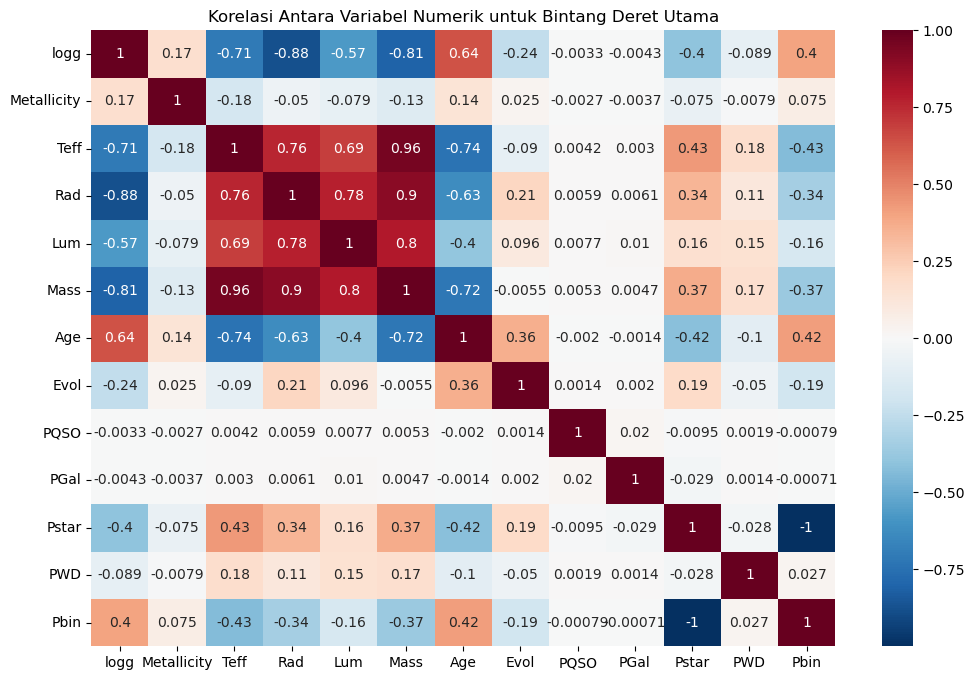

In [71]:
# Buat korelasi antara variabel numerik.
corr_pearson = df_fix_Star_MSS.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_pearson, cmap='RdBu_r', annot=True)

plt.title('Korelasi Antara Variabel Numerik untuk Bintang Deret Utama') # Beri judul.
plt.show() # Tampilkan plot korelasi.

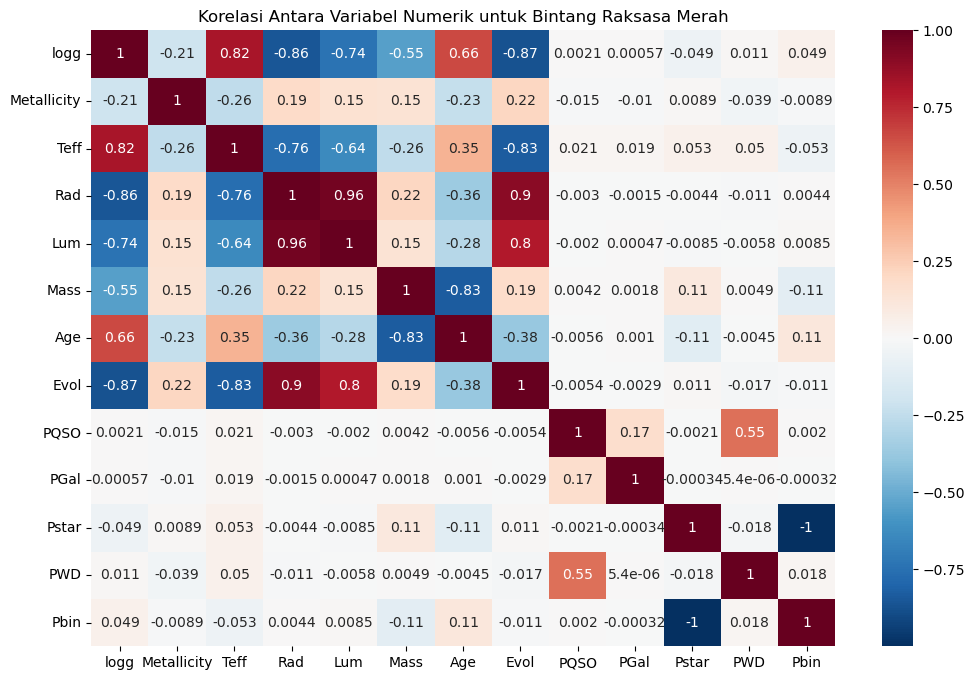

In [72]:
# Buat korelasi antara variabel numerik.
corr_pearson = df_fix_Star_RGS.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_pearson, cmap='RdBu_r', annot=True)

plt.title('Korelasi Antara Variabel Numerik untuk Bintang Raksasa Merah') # Beri judul.
plt.show() # Tampilkan plot korelasi.

[]

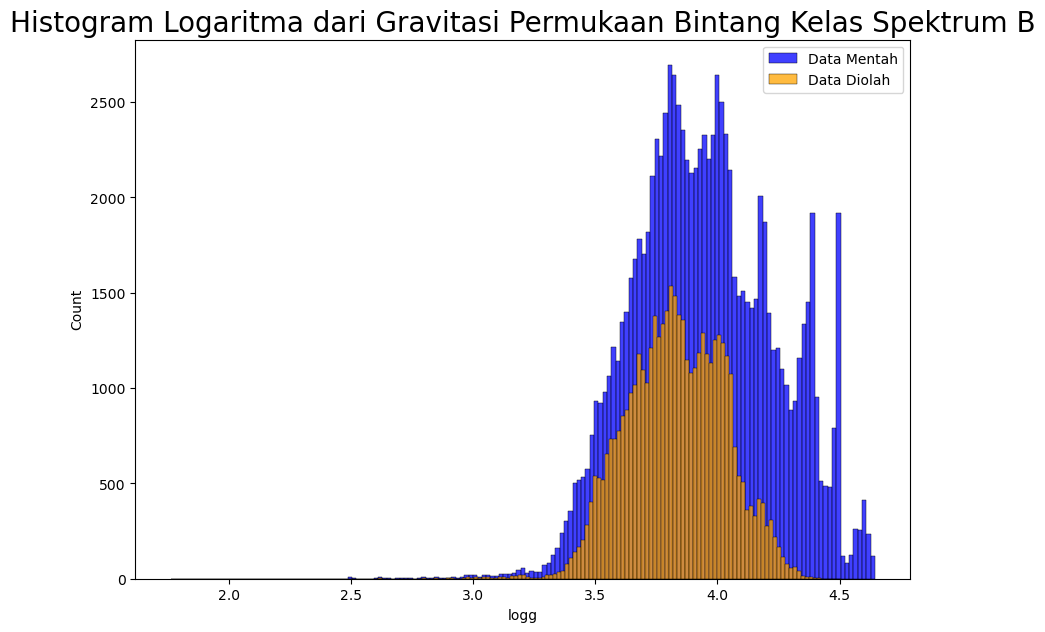

In [73]:
# Buat histogram logaritma dari gravitasi permukaan.
fig, ax = plt.subplots(figsize = (10,7))
plt.title('Histogram Logaritma dari Gravitasi Permukaan Bintang Kelas Spektrum B', fontsize=20)
sns.histplot(data=df_new_B, x="logg",label='Data Mentah',color='blue')
sns.histplot(data=df_fix_B, x="logg",label='Data Diolah',color='orange')
plt.legend()
plt.plot()

[]

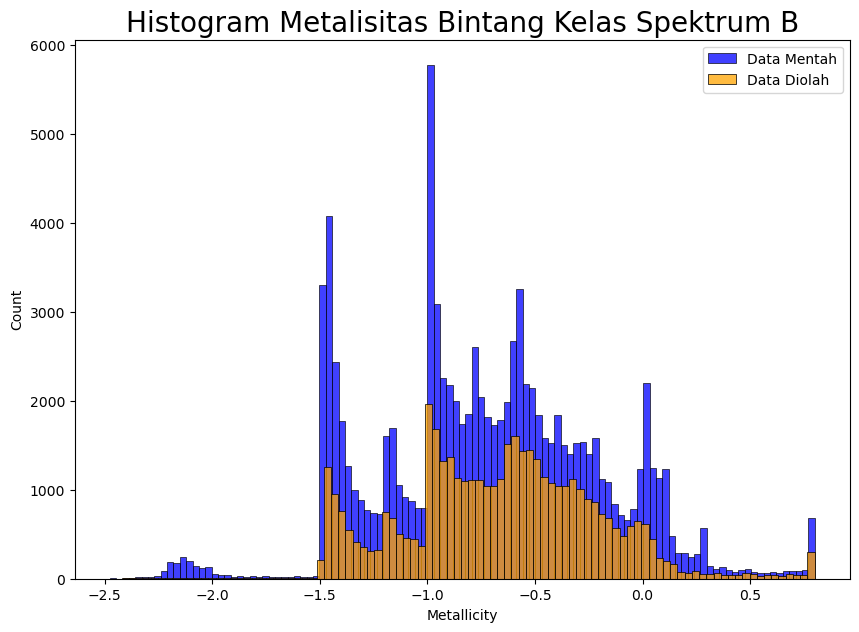

In [74]:
# Buat histogram metalisitas.
fig, ax = plt.subplots(figsize = (10,7))
plt.title('Histogram Metalisitas Bintang Kelas Spektrum B', fontsize=20)
sns.histplot(data=df_new_B, x="Metallicity",label='Data Mentah',color='blue')
sns.histplot(data=df_fix_B, x="Metallicity",label='Data Diolah',color='orange')
plt.legend()
plt.plot()

[]

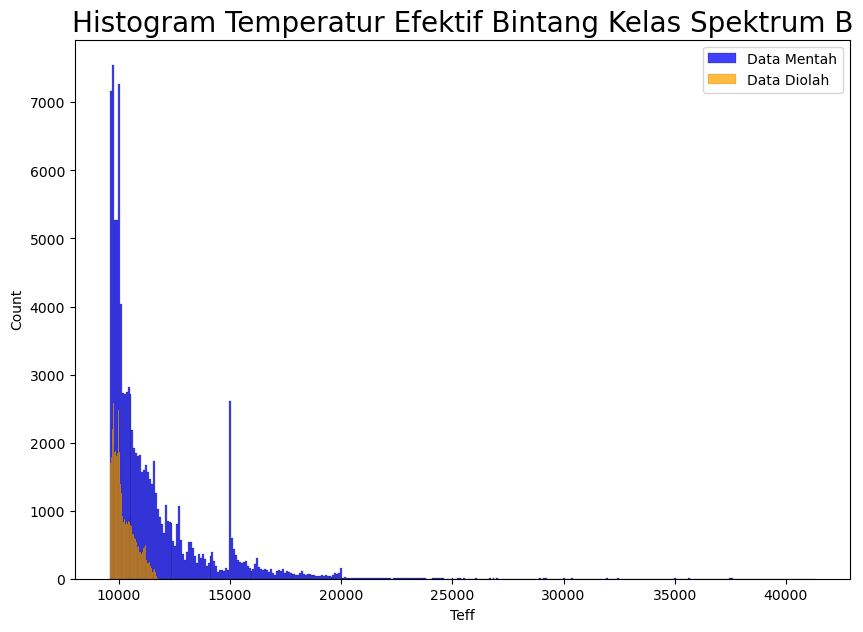

In [75]:
# Buat histogram temperatur efektif.
fig, ax = plt.subplots(figsize = (10,7))
plt.title('Histogram Temperatur Efektif Bintang Kelas Spektrum B', fontsize=20)
sns.histplot(data=df_new_B, x="Teff",label='Data Mentah',color='blue')
sns.histplot(data=df_fix_B, x="Teff",label='Data Diolah',color='orange')
plt.legend()
plt.plot()

[]

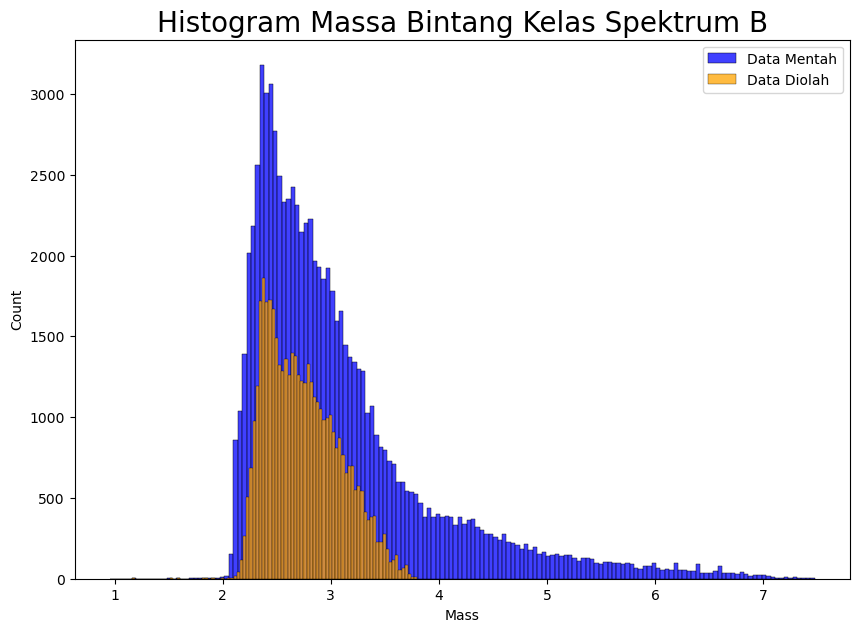

In [76]:
# Buat histogram temperatur efektif.
fig, ax = plt.subplots(figsize = (10,7))
plt.title('Histogram Massa Bintang Kelas Spektrum B', fontsize=20)
sns.histplot(data=df_new_B, x="Mass",label='Data Mentah',color='blue')
sns.histplot(data=df_fix_B, x="Mass",label='Data Diolah',color='orange')
plt.legend()
plt.plot()

In [77]:
# Cek info data.
df_fix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544681 entries, 0 to 544680
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   logg          544681 non-null  float64
 1   Metallicity   544681 non-null  float64
 2   Teff          544681 non-null  float64
 3   Rad           544681 non-null  float64
 4   Lum           544681 non-null  float64
 5   Mass          544681 non-null  float64
 6   Age           544681 non-null  float64
 7   SpectralType  544681 non-null  object 
 8   Evol          544681 non-null  float64
 9   PQSO          544681 non-null  float64
 10  PGal          544681 non-null  float64
 11  Pstar         544681 non-null  float64
 12  PWD           544681 non-null  float64
 13  Pbin          544681 non-null  float64
dtypes: float64(13), object(1)
memory usage: 58.2+ MB


In [78]:
X_MSS = df_fix_Star_MSS.iloc[:,[0,2,3,5]]
y_MSS = df_fix_Star_MSS.iloc[:,6]

X_MSS_train, X_MSS_test, y_MSS_train, y_MSS_test = train_test_split(X_MSS, y_MSS, test_size=0.2, random_state=42)

# Definisi model XGBoost
xgboost_model_MSS = xgb.XGBRegressor()

# Buat rentang learning rate yang akan diuji
lr_arr = np.arange(0.04, 1.04, 0.04)
lr = (list(lr_arr))
for i in range(len(lr)):
    lr[i] = round(lr[i], 2)

# Buat rentang n_estimators yang akan diuji
ne_arr = np.arange(25, 1025, 25)
ne = list(ne_arr)

# Set hyperparameter yang akan diuji
param_grid = {
    'learning_rate': lr,
    'n_estimators': ne
}

# Gunakan GridSearchCV untuk mencari kombinasi hyperparameter terbaik
grid_search_MSS = GridSearchCV(xgboost_model_MSS, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_MSS.fit(X_MSS_train, y_MSS_train)

# Print hyperparameter terbaik
best_params_MSS = grid_search_MSS.best_params_
print("Hyperparameter terbaik:", best_params_MSS)

# Latih ulang model dengan hyperparameter terbaik pada seluruh data pelatihan
best_xgboost_model_MSS = xgb.XGBRegressor(**best_params_MSS)
best_xgboost_model_MSS.fit(X_MSS_train, y_MSS_train)

# Lakukan prediksi pada data pengujian
y_MSS_pred = best_xgboost_model_MSS.predict(X_MSS_test)

# Evaluasi performa model
rmse_MSS_test = mean_squared_error(y_MSS_test, y_MSS_pred) ** 0.5

def rmsle(y_MSS_true, y_MSS_pred):
    return 'RMSLE', np.sqrt(np.mean(np.power(np.log1p(y_MSS_pred) - np.log1p(y_MSS_true), 2))), False

def rae(y_MSS_true, y_MSS_pred):
    return 'RAE', np.sum(np.abs(y_MSS_pred - y_MSS_true)) / np.sum(np.abs(np.mean(y_MSS_true) - y_MSS_true)), False

rmsle_MSS_test = rmsle(y_MSS_test, y_MSS_pred)[1]
rae_MSS_test = rae(y_MSS_test, y_MSS_pred)[1]
mae_MSS_test = mean_absolute_error(y_MSS_test, y_MSS_pred)
r2_MSS_test = r2_score(y_MSS_test, y_MSS_pred)

print(f'The RMSE of prediction is: {rmse_MSS_test}')
print(f'The RMSLE of prediction is: {rmsle_MSS_test}')
print(f'The RAE of prediction is: {rae_MSS_test}')
print(f'The MAE of prediction is: {mae_MSS_test}')
print(f'The R2 Score of prediction is: {r2_MSS_test}')

Hyperparameter terbaik: {'learning_rate': 0.08, 'n_estimators': 775}
The RMSE of prediction is: 0.5780483891967252
The RMSLE of prediction is: 0.10044722107916806
The RAE of prediction is: 0.06017921854933162
The MAE of prediction is: 0.19617560405185788
The R2 Score of prediction is: 0.9790919628121383


C:\Users\ACER\AppData\Local\Temp\ipykernel_3160\1732126506.py:44: RuntimeWarning: invalid value encountered in log1p
  return 'RMSLE', np.sqrt(np.mean(np.power(np.log1p(y_MSS_pred) - np.log1p(y_MSS_true), 2))), False


In [79]:
X_RGS = df_fix_Star_RGS.iloc[:,[0,5]]
y_RGS = df_fix_Star_RGS.iloc[:,6]

X_RGS_train, X_RGS_test, y_RGS_train, y_RGS_test = train_test_split(X_RGS, y_RGS, test_size=0.2, random_state=42)

# Definisi model XGBoost
xgboost_model_RGS = xgb.XGBRegressor()

# Buat rentang learning rate yang akan diuji
lr_arr = np.arange(0.04, 1.04, 0.04)
lr = (list(lr_arr))
for i in range(len(lr)):
    lr[i] = round(lr[i], 2)

# Buat rentang n_estimators yang akan diuji
ne_arr = np.arange(25, 1025, 25)
ne = list(ne_arr)

# Set hyperparameter yang akan diuji
param_grid = {
    'learning_rate': lr,
    'n_estimators': ne
}

# Gunakan GridSearchCV untuk mencari kombinasi hyperparameter terbaik
grid_search_RGS = GridSearchCV(xgboost_model_RGS, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_RGS.fit(X_RGS_train, y_RGS_train)

# Print hyperparameter terbaik
best_params_RGS = grid_search_RGS.best_params_
print("Hyperparameter terbaik:", best_params_RGS)

# Latih ulang model dengan hyperparameter terbaik pada seluruh data pelatihan
best_xgboost_model_RGS = xgb.XGBRegressor(**best_params_RGS)
best_xgboost_model_RGS.fit(X_RGS_train, y_RGS_train)

# Lakukan prediksi pada data pengujian
y_RGS_pred = best_xgboost_model_RGS.predict(X_RGS_test)

# Evaluasi performa model
rmse_RGS_test = mean_squared_error(y_RGS_test, y_RGS_pred) ** 0.5

def rmsle(y_RGS_true, y_RGS_pred):
    return 'RMSLE', np.sqrt(np.mean(np.power(np.log1p(y_RGS_pred) - np.log1p(y_RGS_true), 2))), False

def rae(y_RGS_true, y_RGS_pred):
    return 'RAE', np.sum(np.abs(y_RGS_pred - y_RGS_true)) / np.sum(np.abs(np.mean(y_RGS_true) - y_RGS_true)), False

rmsle_RGS_test = rmsle(y_RGS_test, y_RGS_pred)[1]
rae_RGS_test = rae(y_RGS_test, y_RGS_pred)[1]
mae_RGS_test = mean_absolute_error(y_RGS_test, y_RGS_pred)
r2_RGS_test = r2_score(y_RGS_test, y_RGS_pred)

print(f'The RMSE of prediction is: {rmse_RGS_test}')
print(f'The RMSLE of prediction is: {rmsle_RGS_test}')
print(f'The RAE of prediction is: {rae_RGS_test}')
print(f'The MAE of prediction is: {mae_RGS_test}')
print(f'The R2 Score of prediction is: {r2_RGS_test}')

Hyperparameter terbaik: {'learning_rate': 0.08, 'n_estimators': 100}
The RMSE of prediction is: 0.3519827590459423
The RMSLE of prediction is: 0.03558692362699323
The RAE of prediction is: 0.04062433646371001
The MAE of prediction is: 0.1471177581831598
The R2 Score of prediction is: 0.9927061366485258


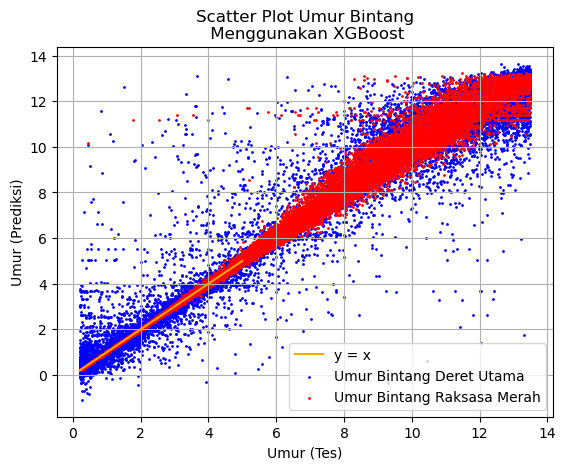

In [80]:
yequalx = np.linspace(0.2,5)

plt.plot(yequalx,yequalx,color='orange',label='y = x')
plt.scatter(y_MSS_test,y_MSS_pred,s=1,color='blue',label='Umur Bintang Deret Utama')
plt.scatter(y_RGS_test,y_RGS_pred,s=1,color='red',label='Umur Bintang Raksasa Merah')
plt.title("Scatter Plot Umur Bintang\n Menggunakan XGBoost") # Beri judul scatter plot.
plt.xlabel("Umur (Tes)") # Beri label x.
plt.ylabel("Umur (Prediksi)") # Beri label y.
plt.grid()
plt.legend()
plt.show() # Tampilkan scatter plot.

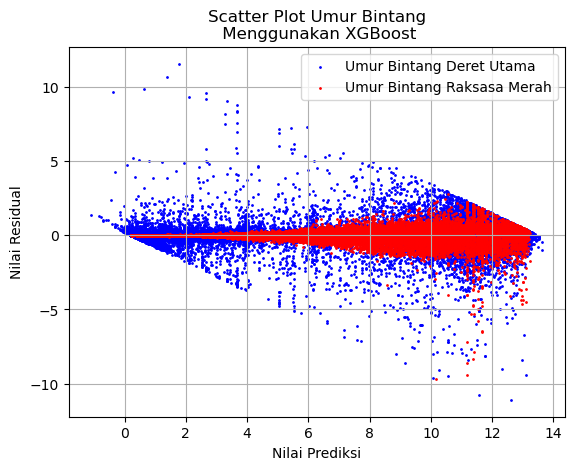

In [81]:
y_residual_MSS = [0 for i in range(len(y_MSS_pred))]
y_residual_RGS = [0 for i in range(len(y_RGS_pred))]

y_MSS_test_arr = np.array(y_MSS_test)
y_RGS_test_arr = np.array(y_RGS_test)

for i in range(len(y_MSS_pred)):
    y_residual_MSS[i] = y_MSS_test_arr[i] - y_MSS_pred[i]
for i in range(len(y_RGS_pred)):
    y_residual_RGS[i] = y_RGS_test_arr[i] - y_RGS_pred[i]

plt.scatter(y_MSS_pred,y_residual_MSS,s=1,color='blue',label='Umur Bintang Deret Utama') # Buat scatter plot data.
plt.scatter(y_RGS_pred,y_residual_RGS,s=1,color='red',label='Umur Bintang Raksasa Merah') # Buat scatter plot data.
plt.title("Scatter Plot Umur Bintang\n Menggunakan XGBoost") # Beri judul scatter plot.
plt.xlabel("Nilai Prediksi") # Beri label x.
plt.ylabel("Nilai Residual") # Beri label y.
plt.grid()
plt.legend()
plt.show() # Tampilkan scatter plot.

In [82]:
print('Tabel Perbandingan Usia Tes dan Prediksi Bintang Deret Utama')

# Buat tabel perbandingan nilai umur tes dan prediksi.
y_MSS_diff_table = {'Usia (Tes)':y_MSS_test_arr,'Usia (Prediksi)':y_MSS_pred}
df_y_MSS_diff_table = pd.DataFrame(y_MSS_diff_table)

df_y_MSS_diff_table

Tabel Perbandingan Usia Tes dan Prediksi Bintang Deret Utama


,Usia (Tes),Usia (Prediksi)
0,1.952,2.003204
1,1.162,1.166445
2,0.251,0.254079
3,0.506,0.509536
4,9.371,10.015074
...,...,...
63573,0.200,0.218291
63574,0.994,1.023819
63575,4.865,4.877729
63576,7.374,7.498662


In [83]:
print('Tabel Perbandingan Usia Tes dan Prediksi Bintang Raksasa Merah Tipe A')

# Buat tabel perbandingan nilai umur tes dan prediksi.
y_RGS_diff_table = {'Usia (Tes)':y_RGS_test_arr,'Usia (Prediksi)':y_RGS_pred}
df_y_RGS_diff_table = pd.DataFrame(y_RGS_diff_table)

df_y_RGS_diff_table

Tabel Perbandingan Usia Tes dan Prediksi Bintang Raksasa Merah Tipe A


,Usia (Tes),Usia (Prediksi)
0,6.837,7.086119
1,2.298,2.298361
2,0.738,0.740534
3,7.510,7.141755
4,0.503,0.503966
...,...,...
43232,10.912,10.314456
43233,12.338,12.242595
43234,4.394,4.601455
43235,1.344,1.344015


In [84]:
# Simpan model untuk Bintang Deret Utama.
# Gunakan fungsi open().
modelMSS = 'C:\\Users\\ACER\\Downloads\\Tugas Akhir Astronomi\\Uji Coba XGBoost\\Version 2\\modelMSS.txt'

# Buka file di write mode
with open(modelMSS,'w') as file:
  # Write content to the file
  file.write(str(best_xgboost_model_MSS))

    
# Simpan model untuk Bintang Raksasa Merah.
# Gunakan fungsi open().
modelRGS = 'C:\\Users\\ACER\\Downloads\\Tugas Akhir Astronomi\\Uji Coba XGBoost\\Version 2\\modelRGS.txt'

# Buka file di write mode
with open(modelRGS,'w') as file:
  # Write content to the file
  file.write(str(best_xgboost_model_RGS))

In [87]:
# Simpan info hyperparameter terbaik untuk Bintang Deret Utama.
# Gunakan fungsi open().
bestparamsMSS = 'C:\\Users\\ACER\\Downloads\\Tugas Akhir Astronomi\\Uji Coba XGBoost\\Version 2\\bestparamsMSS.txt'

# Buka file di write mode
with open(bestparamsMSS,'w') as file:
  # Write content to the file
  file.write(str(best_params_MSS))

    
# Simpan info hyperparameter terbaik untuk Bintang Raksasa Merah.
# Gunakan fungsi open().
bestparamsRGS = 'C:\\Users\\ACER\\Downloads\\Tugas Akhir Astronomi\\Uji Coba XGBoost\\Version 2\\bestparamsRGS.txt'

# Buka file di write mode
with open(bestparamsRGS,'w') as file:
  # Write content to the file
  file.write(str(best_params_RGS))

In [85]:
# Simpan data.
df_y_MSS_diff_table.to_csv('C:\\Users\\ACER\\Downloads\\Tugas Akhir Astronomi\\Uji Coba XGBoost\\Version 2\\MainSequenceStars.csv')
df_y_RGS_diff_table.to_csv('C:\\Users\\ACER\\Downloads\\Tugas Akhir Astronomi\\Uji Coba XGBoost\\Version 2\\RedGiantStars.csv')

In [86]:
data_metric_MSS = {'RMSE':[rmse_MSS_test],'RMSLE':[rmsle_MSS_test],'RAE':[rae_MSS_test],
                  'MAE':[mae_MSS_test],'R2 Score':[r2_MSS_test]}
df_metric_MSS = pd.DataFrame(data_metric_MSS)

data_metric_RGS = {'RMSE':[rmse_RGS_test],'RMSLE':[rmsle_RGS_test],'RAE':[rae_RGS_test],
                  'MAE':[mae_RGS_test],'R2 Score':[r2_RGS_test]}
df_metric_RGS = pd.DataFrame(data_metric_RGS)

# Simpan data.
df_metric_MSS.to_csv('C:\\Users\\ACER\\Downloads\\Tugas Akhir Astronomi\\Uji Coba XGBoost\\Version 2\\Metric_MainSequenceStars.csv')
df_metric_RGS.to_csv('C:\\Users\\ACER\\Downloads\\Tugas Akhir Astronomi\\Uji Coba XGBoost\\Version 2\\Metric_RedGiantStars.csv')